#Import Libraries

In [ ]:
!pip install factor_analyzer streamlit shap -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 964.4 kB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 20.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 1.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, RepeatedKFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from datetime import datetime as dt
import urllib.request
import json
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np
# from factor_analyzer.factor_analyzer import calculate_kmo
from sklearn.feature_selection import RFE
import shap
from sklearn.inspection import PartialDependenceDisplay
import pickle
from imblearn.over_sampling import SMOTE

from scipy import stats
# pearson's correlation feature selection for numeric input and numeric output
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns",None)

# Data Understanding

In [ ]:
df=pd.read_excel("esgdata.xlsx","esgdata")
df

Year            Company_name SEC_code  Industry_type  CSR_commitee  \
0     2017                      3M      MMM              1             0   
1     2017     Abbott Laboratories      ABT              6             0   
2     2017                  AbbVie     ABBV              6             1   
3     2017          ABM Industries      ABM              1             0   
4     2017     Activision Blizzard     ATVI              1             0   
...    ...                     ...      ...            ...           ...   
2308  2021           XPO Logistics      XPO             18             1   
2309  2021              Yum Brands      YUM              5             0   
2310  2021      Yum China Holdings     YUMC              5             1   
2311  2021  Zimmer Biomet Holdings      ZBH              8             1   
2312  2021                  Zoetis      ZTS              6             1   

      CSR_board_size  Compliance_environmental_laws  EPA_fines  \
0                  0                              1          0   
1                  0                              0          0   
2                  5                              0          0   
3                  0                              0          0   
4                  0                              0          0   
...              ...                            ...        ...   
2308               3                              1          0   
2309               0                              0          0   
2310               4                              0          0   
2311               4                              0          0   
2312               5                              0          0   

      Amount_of_fines SDG_targets  Issue_green_bonds  Govt_collaboration  \
0                 0.0         ESG                  0                 1.0   
1                 0.0         ESG                  0                 1.0   
2                 0.0         ESG                  0                 0.0   
3                 0.0         ESG                  0                 0.0   
4                 0.0           G                  0                 0.0   
...               ...         ...                ...                 ...   
2308              0.0         ESG                  0                 0.0   
2309              0.0         ESG                  0                 0.0   
2310              0.0         ESG                  0                 0.0   
2311              0.0         ESG                  0                 0.0   
2312              0.0         ESG                  0                 0.0   

     Total_carbon_emissions Direct_carbon_emissions  \
0                      5840                    3960   
1                      1044                     541   
2                       627                     293   
3                     57.67                   39.38   
4                         0                       0   
...                     ...                     ...   
2308                 1444.7                 1401.01   
2309                 156.63                   39.01   
2310                2317.74                  158.89   
2311                  50.99                       0   
2312                      0                       0   

      Indirect_carbon_emissions  Scope3_carbon_emissions  \
0                       1880.00                  9340.00   
1                        503.00                  7600.00   
2                        334.00                     0.00   
3                          8.30                     0.00   
4                          0.00                     0.00   
...                         ...                      ...   
2308                      43.70                   917.06   
2309                     117.62                 35134.50   
2310                    2158.86                  8446.96   
2311                       0.00                     0.00   
2312                       0.00                     0.00   

     

In [ ]:
definition=pd.read_excel("esgdata.xlsx","definition")
definition

Column  \
0                                                Year   
1                                        Company_name   
2                                            SEC_code   
3                                       Industry_type   
4                                       CSR_committee   
5                                      CSR_board_size   
6                       Compliance_environmental_laws   
7                                           EPA_fines   
8                                     Amount_of_fines   
9                                         SDG_targets   
10                                  Issue_green_bonds   
11                                 Govt_collaboration   
12                             Total_carbon_emissions   
13                            Direct_carbon_emissions   
14                          Indirect_carbon_emissions   
15                            Scope3_carbon_emissions   
16                               Environmental_scores   
17                                  Disclosure_scores   
18                                Energy_conservation   
19                                    Water_treatment   
20                                          Recycling   
21                                       Biodiversity   
22                                   Waste_management   
23                                   Green_innovation   
24                                          GHG_sales   
25                                   Net_zero_targets   
26                                  Disclosure_of_R&D   
27                              Climate_change_policy   
28                                     Renewal_energy   
29  Dow_jones_sustainability_index, FTSE4Good_Inde...   
30  Global_reporting_initiative, Integrated_report...   
31                                         Risk_score   
32                                  Controversy_level   
33                               Planning_zero_carbon   
34                                          ESG_funds   

                                          Description  
0   The calendar year (2017 to 2021) the data pert...  
1                The name of the Fortune 500 company.  
2   A unique identifier code for the company, like...  
3   A numerical code representing the industry sec...  
4   Indicates whether the company has a dedicated ...  
5   The size of the CSR committee or board within ...  
6   Indicates compliance with environmental laws (...  
7   Indicates whether the company has been fined b...  
8   The total monetary amount of fines levied agai...  
9   Indicates the company's commitment or alignmen...  
10  Indicates if the company has issued green bond...  
11  Indicates whether the company collaborates wit...  
12  The total carbon emissions of the company, lik...  
13  The direct carbon emissions from sources that ...  
14  The indirect carbon emissions resulting from t...  
15  Represents other indirect emissions, such as t...  
16  A numerical score indicating the company's per...  
17  A numerical score reflecting how transparently...  
18  Indicates if the company engages in energy con...  
19  Indicates if the company has water treatment i...  
20  Indicates if the company has recycling program...  
21  Indicates efforts towards biodiversity conserv...  
22  Indicates if the company manages its waste in ...  
23  Indicates the company's investment in green te...  
24  Possibly refers to the company's revenue from ...  
25  Indicates if the company has set targets to ac...  
26  Indicates if the company discloses its researc...  
27  Indicates whether the company has a policy on ...  
28  Indicates the company's commitment to renewabl...  
29  These columns represent the company's inclusio...  
30  Indicates adherence to international reporting...  
31  A numerical score that may indicate the compan...  
32  A numerical indicator of the level of controve...  
33  Indicates if the company is in the planning st...  
34  The amount of funds or investm

In [ ]:
industry=pd.read_excel("esgdata.xlsx","industry_type",usecols=[1])
industry

Business Services
0                               Apparel
1                              Chemical
2                                Energy
3             Food, Beverages & Tobacco
4                           Health care
5         Industrials and Manufacturing
6                             Materials
7          Rengineeing and Construction
8                                 Media
9                    Telecommunications
10                           Technology
11                           Financials
12                   Food & Drug Stores
13                            Insurance
14                   Household products
15                          Wholesalers
16                      Transportations
17  Motor Vehicles, Aerospace and Parts
18                               Sports

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2313 entries, 0 to 2312
Data columns (total 38 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Year                            2313 non-null   int64  
 1   Company_name                    2313 non-null   object 
 2   SEC_code                        2313 non-null   object 
 3   Industry_type                   2313 non-null   int64  
 4   CSR_commitee                    2313 non-null   int64  
 5   CSR_board_size                  2313 non-null   int64  
 6   Compliance_environmental_laws   2313 non-null   int64  
 7   EPA_fines                       2313 non-null   int64  
 8   Amount_of_fines                 2313 non-null   float64
 9   SDG_targets                     2313 non-null   object 
 10  Issue_green_bonds               2313 non-null   int64  
 11  Govt_collaboration              2311 non-null   float64
 12  Total_carbon_emissions          23

In [ ]:
df.GHG_sales.replace({"No":0},inplace=True)
df.Direct_carbon_emissions.replace({"433,63":433.63,"29..80":29.8},inplace=True)
df.Total_carbon_emissions.replace({"40.3/02":40.3, "8.159.97":8159.97,"33.064.3":33064.3},inplace=True)
df.SDG_targets.replace({0:"-"},inplace=True)
df.Integrated_reporting_framework.replace({2:1},inplace=True)

In [ ]:
comps=df.SEC_code.unique()
df_score = pd.DataFrame()

for comp in comps:
  url = "https://query2.finance.yahoo.com/v1/finance/esgChart?symbol="+comp
  try:
    connection = urllib.request.urlopen(url)
    data = connection.read()
    data_2 = json.loads(data)
    Formatdata = data_2["esgChart"]["result"][0]["symbolSeries"]
    Formatdata_2 = pd.DataFrame(Formatdata)
    Formatdata_2["timestamp"] = pd.to_datetime(Formatdata_2["timestamp"], unit="s")
    Formatdata_2['Year']=Formatdata_2.timestamp.astype(str).str[:4]
    Formatdata_2=Formatdata_2.groupby("Year").mean().round(2)
    Formatdata_2.reset_index(inplace=True)
    Formatdata_2["SEC_code"]=comp
    Formatdata_2.drop("timestamp",axis=1,inplace=True)
    df_score = pd.concat([df_score, Formatdata_2], ignore_index=True)
  except:
    pass
df_score["Year"]=df_score.Year.astype(int)
df_score

Year  esgScore  governanceScore  environmentScore  socialScore SEC_code
0     2014     72.75            73.00             72.75        74.00      MMM
1     2015     74.08            78.08             71.17        74.83      MMM
2     2016     70.76            78.02             68.10        68.61      MMM
3     2017     65.87            75.18             56.33        70.12      MMM
4     2018     65.27            71.85             57.53        69.38      MMM
...    ...       ...              ...               ...          ...      ...
3462  2019     58.72            62.39             63.59        52.16      HRL
3463  2020     26.24             4.98             10.02        11.23      HRL
3464  2021     26.10             5.04             10.73        10.32      HRL
3465  2022     28.74             6.21             11.40        11.14      HRL
3466  2023     29.96             6.00             13.27        10.68      HRL

[3467 rows x 6 columns]

In [ ]:
df = df.merge(df_score, on=["Year","SEC_code"], how="inner")
df

Year            Company_name SEC_code  Industry_type  CSR_commitee  \
0     2017                      3M      MMM              1             0   
1     2017     Abbott Laboratories      ABT              6             0   
2     2017                  AbbVie     ABBV              6             1   
3     2017     Activision Blizzard     ATVI              1             0   
4     2017                   Adobe     ADBE             12             0   
...    ...                     ...      ...            ...           ...   
1756  2021                 Willams      WMB              3             1   
1757  2021             Xcel Energy      XEL              4             1   
1758  2021              Yum Brands      YUM              5             0   
1759  2021  Zimmer Biomet Holdings      ZBH              8             1   
1760  2021                  Zoetis      ZTS              6             1   

      CSR_board_size  Compliance_environmental_laws  EPA_fines  \
0                  0                              1          0   
1                  0                              0          0   
2                  5                              0          0   
3                  0                              0          0   
4                  0                              0          0   
...              ...                            ...        ...   
1756               5                              0          1   
1757               6                              1          0   
1758               0                              0          0   
1759               4                              0          0   
1760               5                              0          0   

      Amount_of_fines SDG_targets  Issue_green_bonds  Govt_collaboration  \
0                 0.0         ESG                  0                 1.0   
1                 0.0         ESG                  0                 1.0   
2                 0.0         ESG                  0                 0.0   
3                 0.0           G                  0                 0.0   
4                 0.0         ESG                  0                 0.0   
...               ...         ...                ...                 ...   
1756          28528.0         ESG                  0                 0.0   
1757              0.0         ESG                  0                 0.0   
1758              0.0         ESG                  0                 0.0   
1759              0.0         ESG                  0                 0.0   
1760              0.0         ESG                  0                 0.0   

      Total_carbon_emissions  Direct_carbon_emissions  \
0                    5840.00                  3960.00   
1                    1044.00                   541.00   
2                     627.00                   293.00   
3                       0.00                     0.00   
4                      80.75                    14.48   
...                      ...                      ...   
1756                11920.00                 10260.00   
1757                   40.20                 39500.00   
1758                  156.63                    39.01   
1759                   50.99                     0.00   
1760                    0.00                     0.00   

      Indirect_carbon_emissions  Scope3_carbon_emissions  \
0                       1880.00                  9340.00   
1                        503.00                  7600.00   
2                        334.00                     0.00   
3                          0.00                     0.00   
4                         66.27                    96.05   
...                         ...                      ...   
1756                    1660.00                 20506.50   
1757                     700.00                     0.00   
1758                     117.62                 35134.50   
1759                       0.00                     0.00   
1760                       0.00           

In [ ]:
df[(df.Year<=2019) & (df.esgScore<40)][["Year","SEC_code","Environmental_scores","Disclosure_scores","Risk_score","esgScore","governanceScore","environmentScore","socialScore"]]

Year SEC_code  Environmental_scores  Disclosure_scores  Risk_score  \
983   2019      RTX                 34.25              47.56       34.98   
1019  2019      TFC                 15.55              46.00       18.16   

      esgScore  governanceScore  environmentScore  socialScore  
983      30.00             8.27              7.99        13.75  
1019     25.42            10.39              2.01        13.02

In [ ]:
df.groupby("SEC_code")["Risk_score"].value_counts() #The original Risk score is not updated

SEC_code  Risk_score
AA        24.78         5
AAL       29.10         5
AAP       12.97         5
AAPL      16.41         5
ABBV      27.84         5
                       ..
XRX       16.89         3
Y         21.71         5
YUM       20.55         5
ZBH       27.30         5
ZTS       18.47         5
Name: count, Length: 364, dtype: int64

In [ ]:
old_sustainalytics=df[(df.Year<=2019) & (df.esgScore>=40)][["Year","SEC_code","Environmental_scores","Disclosure_scores","Risk_score","esgScore","governanceScore","environmentScore","socialScore"]]
old_sustainalytics[["esgScore","governanceScore","environmentScore","socialScore"]].describe()

esgScore  governanceScore  environmentScore  socialScore
count  1056.000000      1056.000000       1056.000000  1056.000000
mean     58.870852        63.131004         58.327169    56.844688
std       8.079415         8.171880         12.683772     9.879457
min      40.140000        38.990000         30.600000    36.480000
25%      52.767500        57.697500         48.992500    49.485000
50%      58.720000        63.285000         57.510000    56.455000
75%      64.650000        68.935000         67.722500    63.132500
max      85.410000        88.900000         89.340000    90.910000

In [ ]:
def adjust_risk_score(score):
  return round((score-old_sustainalytics.esgScore.min())/(old_sustainalytics.esgScore.max()-old_sustainalytics.esgScore.min())*(df[(df.Year>2019)].esgScore.max()-df[(df.Year>2019)].esgScore.min())+df[(df.Year>2019)].esgScore.min(),2)
df.loc[(df.Year<=2019)  & (df.esgScore>40),"esgScore"]=df[(df.Year<=2019)  & (df.esgScore>40)]["esgScore"].apply(adjust_risk_score)

In [ ]:
df[(df.Year<=2019)][["Year","SEC_code","Environmental_scores","Disclosure_scores","Risk_score","esgScore","governanceScore","environmentScore","socialScore"]].describe()

Year  Environmental_scores  Disclosure_scores   Risk_score  \
count  1058.000000           1058.000000        1058.000000  1058.000000   
mean   2018.006616             33.764187          51.259972    21.205652   
std       0.815504             21.335385          19.777753     7.789820   
min    2017.000000              0.000000           0.000000     0.000000   
25%    2017.000000             16.790000          40.822500    15.832500   
50%    2018.000000             34.025000          51.150000    21.510000   
75%    2019.000000             49.620000          60.195000    26.160000   
max    2019.000000             86.170000         559.200000    43.230000   

          esgScore  governanceScore  environmentScore  socialScore  
count  1058.000000      1058.000000       1058.000000  1058.000000  
mean     25.707108        63.029301         58.226361    56.762533  
std       7.871439         8.492465         12.882596    10.049192  
min       7.440000         8.270000          2.010000    13.020000  
25%      19.757500        57.667500         48.812500    49.432500  
50%      25.560000        63.270000         57.485000    56.420000  
75%      31.322500        68.915000         67.720000    63.110000  
max      51.580000        88.900000         89.340000    90.910000

In [ ]:
df[(df.Year>2019)][["esgScore","governanceScore","environmentScore","socialScore"]].describe()

esgScore  governanceScore  environmentScore  socialScore
count  703.000000       703.000000        703.000000   703.000000
mean    23.769957         7.338592          5.850711    10.265605
std      7.672871         2.873486          5.575911     4.012098
min      7.440000         0.000000          0.000000     0.000000
25%     18.055000         5.465000          1.540000     7.750000
50%     23.070000         6.630000          3.790000     9.960000
75%     29.175000         8.560000          9.050000    12.795000
max     51.580000        17.780000         24.840000    26.870000

In [ ]:
df.loc[(df.Year<=2019),"totalScore"]=df.loc[(df.Year<=2019),"governanceScore"]+df.loc[(df.Year<=2019),"environmentScore"]+df.loc[(df.Year<=2019),"socialScore"]
df.loc[(df.Year<=2019),"governanceScore"]=df.loc[(df.Year<=2019),"governanceScore"]/df.loc[(df.Year<=2019),"totalScore"]*df.loc[(df.Year<=2019),"esgScore"]
df.loc[(df.Year<=2019),"environmentScore"]=df.loc[(df.Year<=2019),"environmentScore"]/df.loc[(df.Year<=2019),"totalScore"]*df.loc[(df.Year<=2019),"esgScore"]
df.loc[(df.Year<=2019),"socialScore"]=df.loc[(df.Year<=2019),"socialScore"]/df.loc[(df.Year<=2019),"totalScore"]*df.loc[(df.Year<=2019),"esgScore"]
df.drop("totalScore",axis=1,inplace=True)
df[(df.Year<=2019)][["esgScore","governanceScore","environmentScore","socialScore"]].describe()

esgScore  governanceScore  environmentScore  socialScore
count  1058.000000      1058.000000       1058.000000  1058.000000
mean     25.707108         9.003267          8.482023     8.221818
std       7.871439         2.445014          3.144436     2.760069
min       7.440000         2.686049          2.010000     2.440188
25%      19.757500         7.227789          6.143272     6.080789
50%      25.560000         9.021481          8.246600     8.097908
75%      31.322500        10.746774         10.840045    10.050946
max      51.580000        16.420492         17.060470    18.282543

In [ ]:
df=df[df.Year>=2020]
df = df.round(2)
df.drop("Company_name",axis=1,inplace=True) #Already have SEC_code
df.drop(["Disclosure_scores","Risk_score","Environmental_scores","FTSE4Good_Index","Dow_jones_sustainability_index","MSCI_ESG_index"],axis=1,inplace=True) #Unused scores
df

Year SEC_code  Industry_type  CSR_commitee  CSR_board_size  \
1058  2020      MMM              1             1               5   
1059  2020      ABT              6             1               7   
1060  2020     ABBV              6             1               6   
1061  2020     ATVI              1             0               0   
1062  2020     ADBE             12             0               0   
...    ...      ...            ...           ...             ...   
1756  2021      WMB              3             1               5   
1757  2021      XEL              4             1               6   
1758  2021      YUM              5             0               0   
1759  2021      ZBH              8             1               4   
1760  2021      ZTS              6             1               5   

      Compliance_environmental_laws  EPA_fines  Amount_of_fines SDG_targets  \
1058                              1          0              0.0         ESG   
1059                              0          0              0.0         ESG   
1060                              0          0              0.0         ESG   
1061                              0          0              0.0         ESG   
1062                              0          0              0.0         ESG   
...                             ...        ...              ...         ...   
1756                              0          1          28528.0         ESG   
1757                              1          0              0.0         ESG   
1758                              0          0              0.0         ESG   
1759                              0          0              0.0         ESG   
1760                              0          0              0.0         ESG   

      Issue_green_bonds  Govt_collaboration  Total_carbon_emissions  \
1058                  0                 1.0                 5280.00   
1059                  0                 1.0                  980.00   
1060                  0                 1.0                  578.00   
1061                  0                 0.0                    0.00   
1062                  0                 0.0                   61.02   
...                 ...                 ...                     ...   
1756                  0                 0.0                11920.00   
1757                  0                 0.0                   40.20   
1758                  0                 0.0                  156.63   
1759                  0                 0.0                   50.99   
1760                  0                 0.0                    0.00   

      Direct_carbon_emissions  Indirect_carbon_emissions  \
1058                  3600.00                    1680.00   
1059                   500.00                     480.00   
1060                   265.00                     313.00   
1061                     0.00                       0.00   
1062                     9.84                      51.18   
...                       ...                        ...   
1756                 10260.00                    1660.00   
1757                 39500.00                     700.00   
1758                    39.01                     117.62   
1759                     0.00                       0.00   
1760                     0.00                       0.00   

      Scope3_carbon_emissions  Energy_conservation  Water_treatment  \
1058                  9279.30                    1                1   
1059                 11222.10                    1                1   
1060                     0.00                    1                1   
1061                     0.00                    1                0   
1062                   438.24                    1                0   
...                       ...                  ...              ...   
1756                 20506.50                    1                1   
1757                     0.00                    1                1   
1758                 35134.

#Data Exploration

Text(0.5, 0, 'ESG Score')

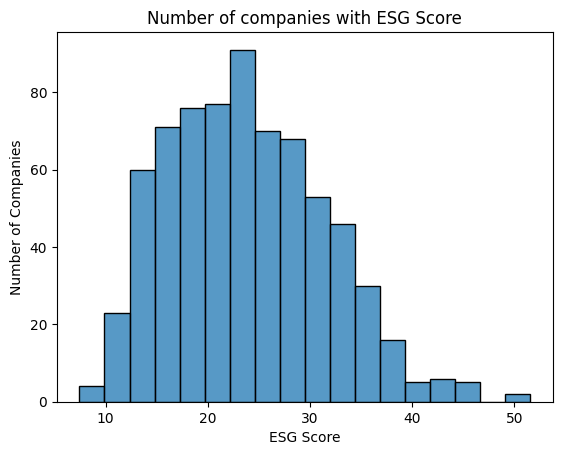

In [ ]:
sns.histplot(df.esgScore)
plt.title("Number of companies with ESG Score")
plt.ylabel("Number of Companies")
plt.xlabel("ESG Score")

<Axes: ylabel='esgScore'>

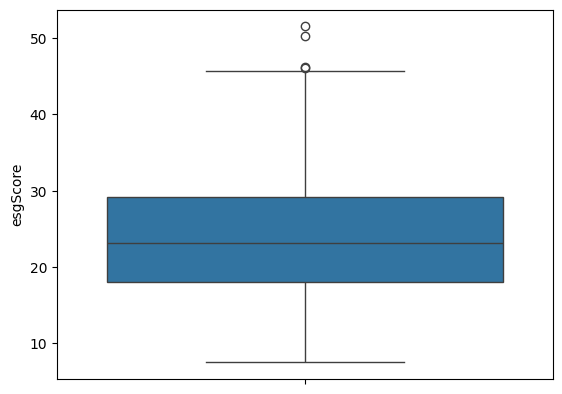

In [ ]:
sns.boxplot(df.esgScore)
#ESG score have outliers but will be retained as some companies might perform extremely well on their ESG

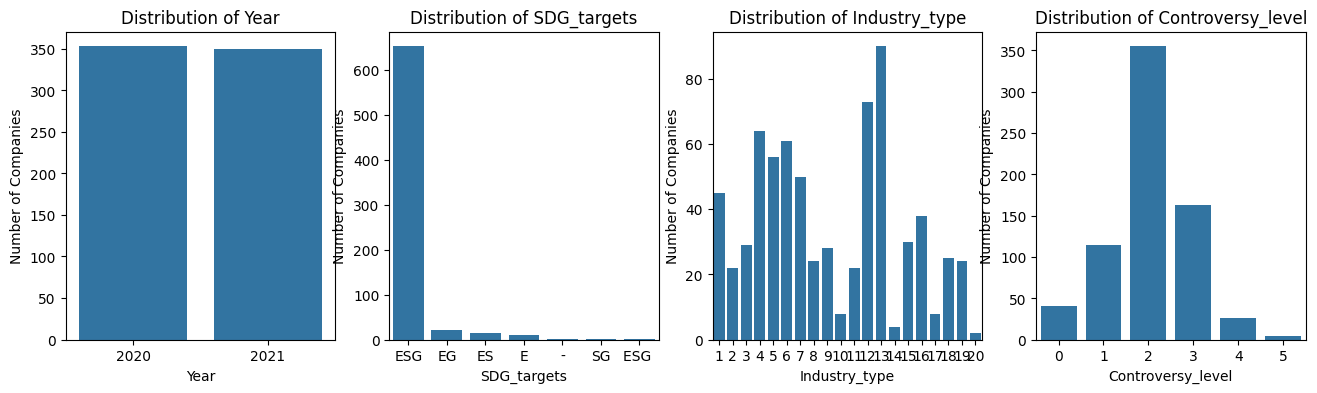

In [ ]:
cat_cols=["Year","SDG_targets","Industry_type","Controversy_level"]
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16, 4))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
  sns.barplot(df[col].value_counts(), ax=axes[i])
  axes[i].set_title(f"Distribution of {col}")
  axes[i].set_xlabel(col)
  axes[i].set_ylabel("Number of Companies")

# Hide any unused subplots
for i in range(len(cat_cols), len(axes)):
  axes[i].axis('off')

# plt.tight_layout()
plt.show()


In [ ]:
bool_cols=["CSR_commitee","Compliance_environmental_laws","EPA_fines","Issue_green_bonds","Govt_collaboration","Energy_conservation", \
           "Water_treatment","Recycling","Biodiversity","Waste_management","Green_innovation","E","S","G","Integrated_reporting_framework", \
           "Net_zero_targets","Disclosure_of_R&D","Climate_change_policy","Renewal_energy","Global_reporting_initiative","Planning_zero_carbon"]
for col in bool_cols:
  if col in df.columns:
    df[col]=df[col].astype(bool)

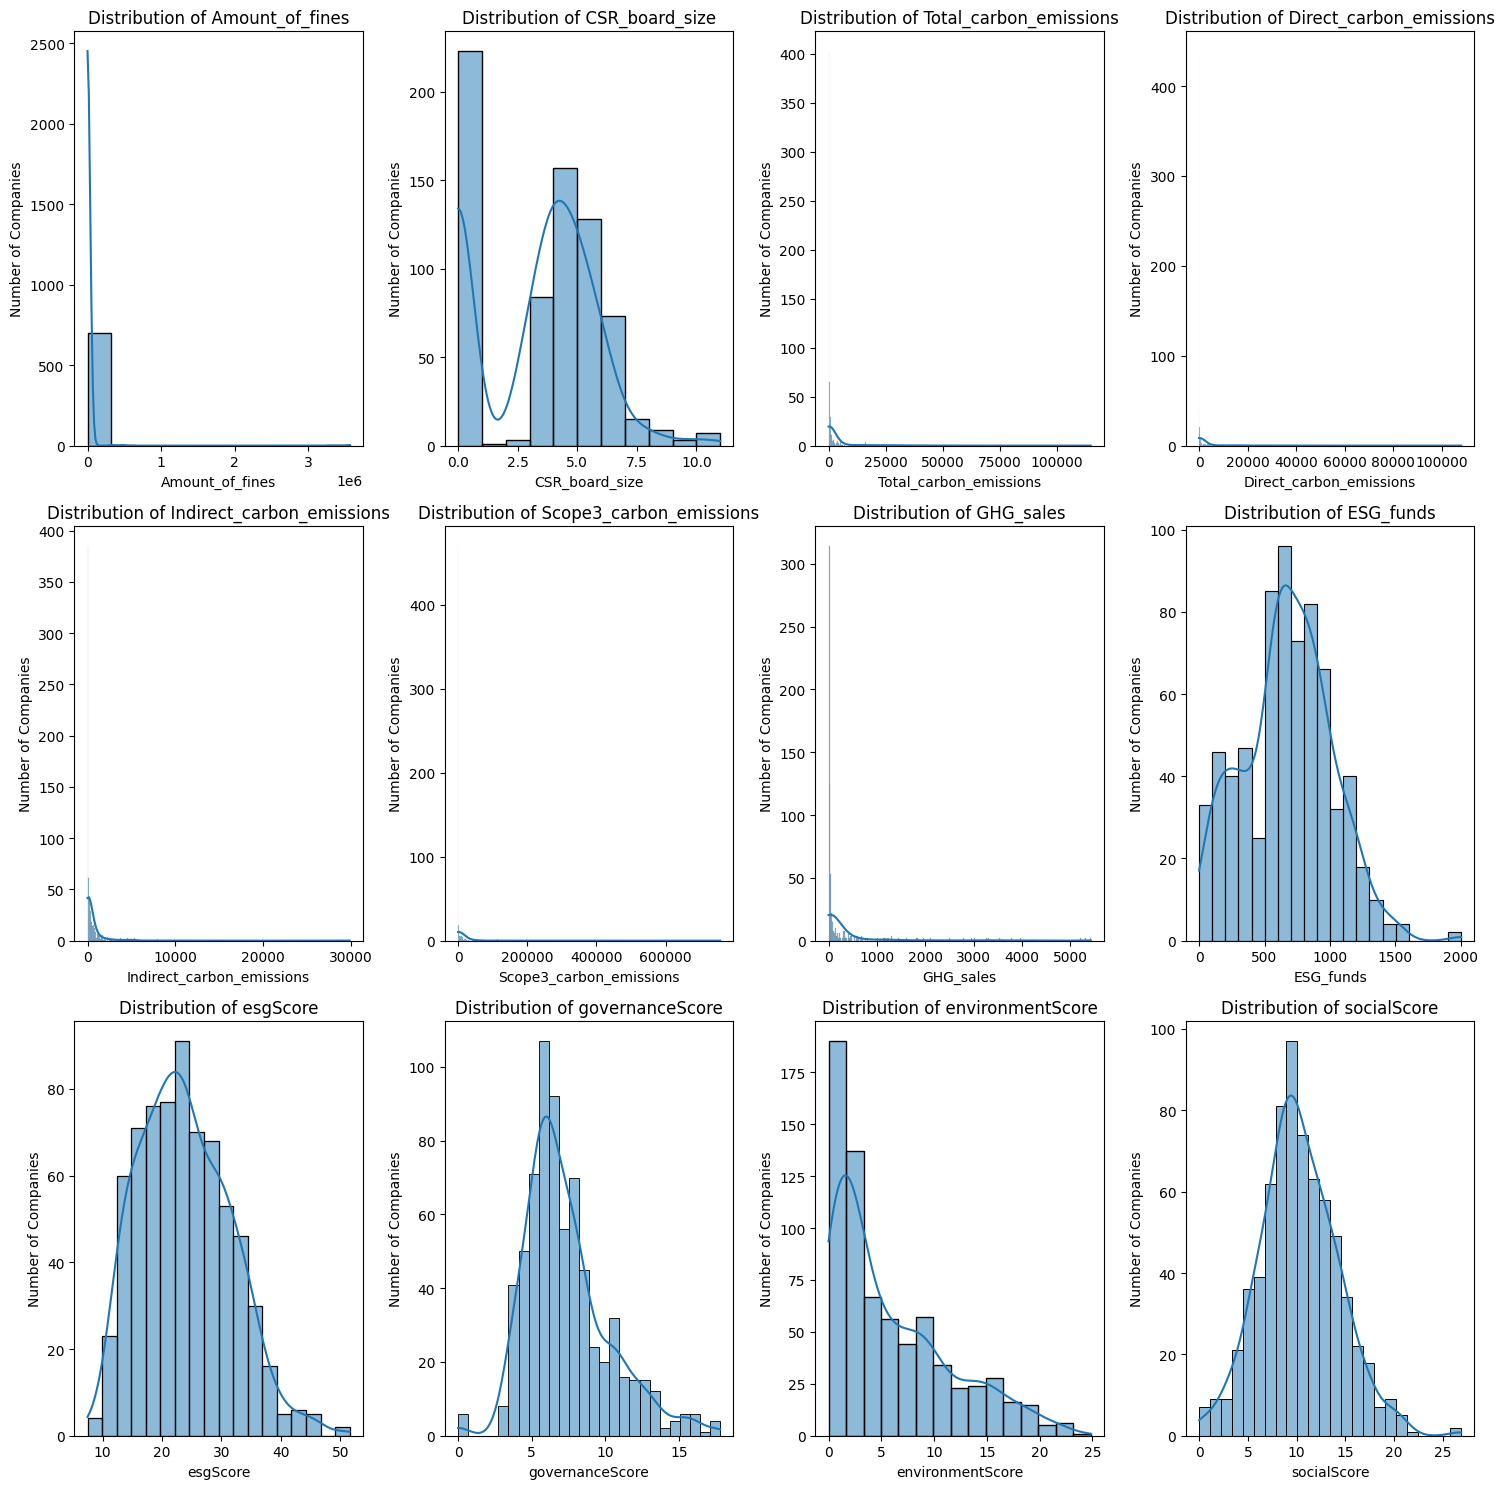

In [ ]:
# Plot histograms for all numerical columns
numerical_cols = ["Amount_of_fines","CSR_board_size","Total_carbon_emissions","Direct_carbon_emissions","Indirect_carbon_emissions","Scope3_carbon_emissions", "GHG_sales","ESG_funds","esgScore","governanceScore","environmentScore","socialScore"]

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 15))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
  sns.histplot(x=df[col], kde=True, ax=axes[i])
  axes[i].set_title(f"Distribution of {col}")
  axes[i].set_xlabel(col)
  axes[i].set_ylabel("Number of Companies")

# Hide any unused subplots
for i in range(len(numerical_cols), len(axes)):
  axes[i].axis('off')

plt.tight_layout()
plt.show()


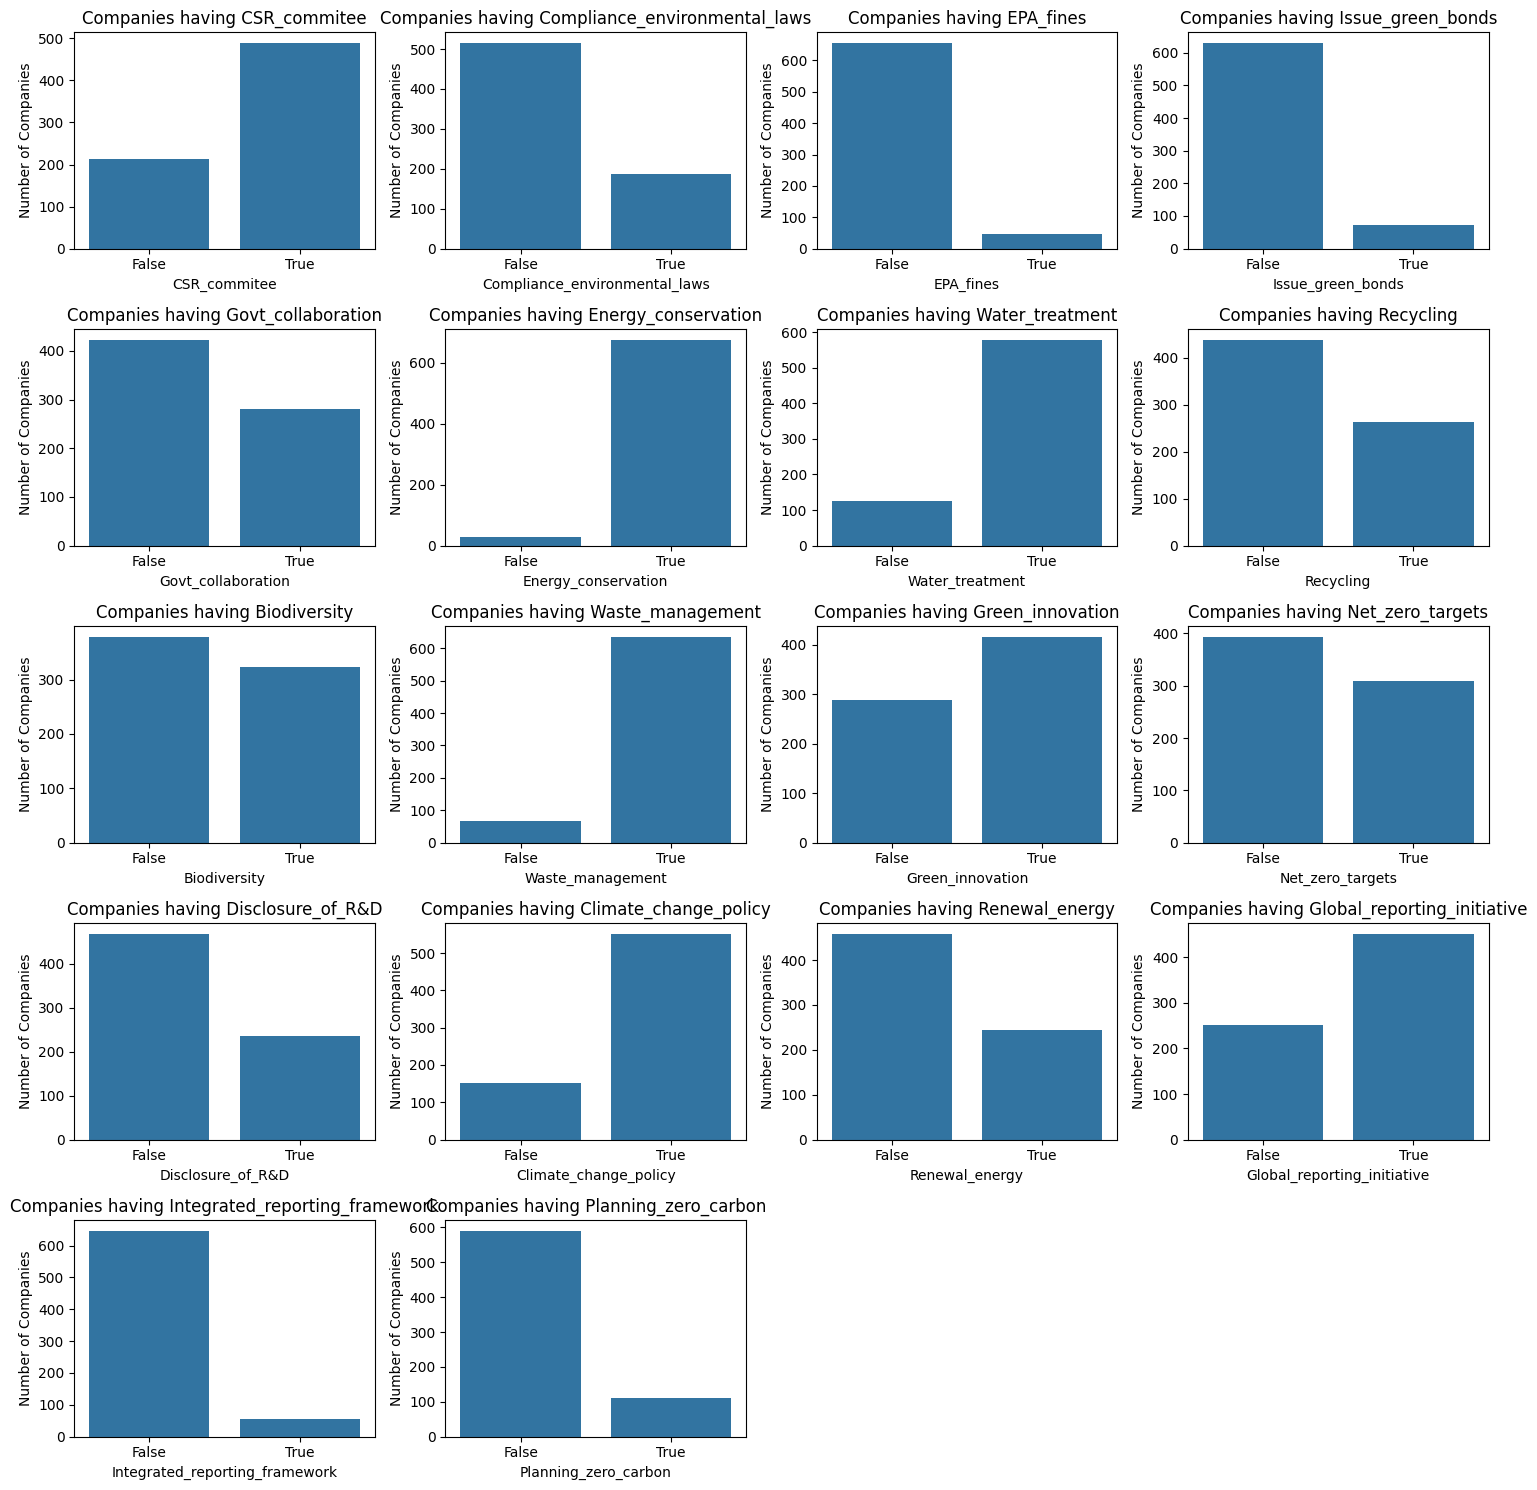

In [ ]:
# Plot count plots for all boolean columns in 4x4 axes
boolean_cols = df.select_dtypes(include=['bool']).columns  # skip CSR commitee
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(15, 15))
axes = axes.flatten()

for i, col in enumerate(boolean_cols):
    sns.countplot(x=df[col], ax=axes[i])
    axes[i].set_title(f"Companies having {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Number of Companies")

# Hide any unused subplots
for i in range(len(boolean_cols), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()


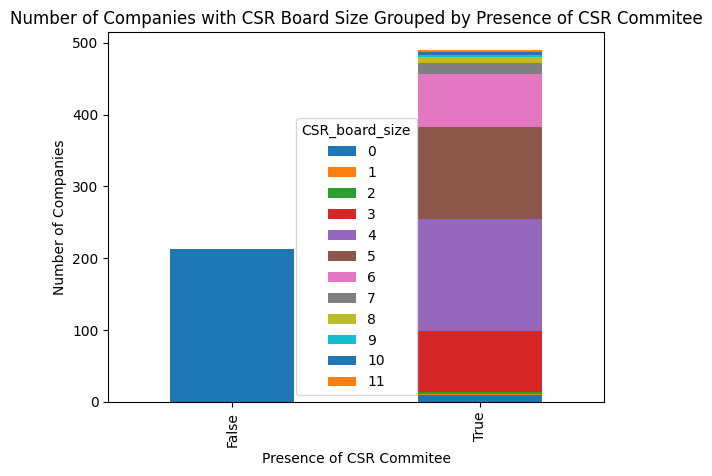

In [ ]:
df.groupby("CSR_commitee")["CSR_board_size"].value_counts().unstack().plot(kind='bar', stacked=True)
plt.title("Number of Companies with CSR Board Size Grouped by Presence of CSR Commitee")
plt.ylabel("Number of Companies")
plt.xlabel("Presence of CSR Commitee")
plt.show()


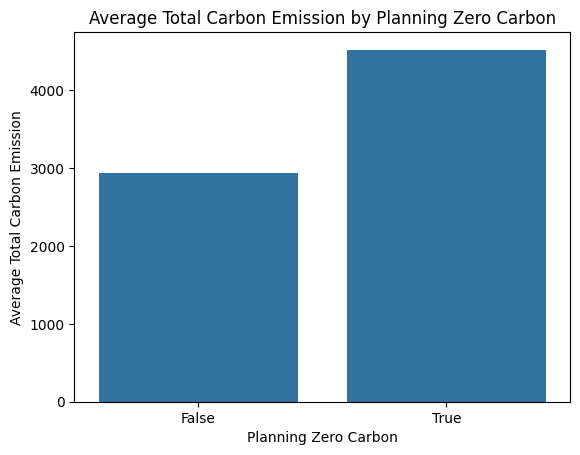

In [ ]:
sns.barplot(df.groupby("Planning_zero_carbon")["Total_carbon_emissions"].mean())
plt.title("Average Total Carbon Emission by Planning Zero Carbon")
plt.ylabel("Average Total Carbon Emission")
plt.xlabel("Planning Zero Carbon")
plt.show()
#Companies planning zero carbon actually release more carbon

# Data Preparation

In [ ]:
def remove_outlier(col):
  # finding the 1st quartile
  q1 = np.quantile(col, 0.25)

  # finding the 3rd quartile
  q3 = np.quantile(col, 0.75)
  med = np.median(col)

  # finding the iqr region
  iqr = q3-q1

  # finding upper and lower whiskers
  upper_bound = q3+(1.5*iqr)
  lower_bound = q1-(1.5*iqr)
  print(iqr, upper_bound, lower_bound)
  df=df[(df[col]>=lower_bound) & (df[col]<=upper_bound)]
  return df

In [ ]:
df['esgScore_binned'] = pd.cut(df['esgScore'], bins=5, labels=False)
df_train,df_test = train_test_split(df, test_size=0.1, stratify=df["esgScore_binned"],random_state=42)
##df_train=df[df.Year<2021]
# df_train=df[df.Year<=2020]
# df_test=df[df.Year==2021]
df_train.drop("esgScore_binned",axis=1,inplace=True)
df_test.drop("esgScore_binned",axis=1,inplace=True)
df_train

Year SEC_code  Industry_type  CSR_commitee  CSR_board_size  \
1493  2021        C             13          True               7   
1400  2020      WEC              4         False               0   
1411  2021      MMM              1          True               4   
1594  2021      SJM              5          True               3   
1088  2020     AAPL             12         False               0   
...    ...      ...            ...           ...             ...   
1081  2020      AIG             15          True               4   
1323  2020      PII             19         False               0   
1615  2021      LMT             12          True               6   
1368  2020      TMO              6          True               4   
1511  2021      CSX             18          True               5   

      Compliance_environmental_laws  EPA_fines  Amount_of_fines SDG_targets  \
1493                          False      False              0.0         ESG   
1400                           True       True              0.0         ESG   
1411                           True      False              0.0         ESG   
1594                          False      False              0.0         ESG   
1088                          False      False              0.0         ESG   
...                             ...        ...              ...         ...   
1081                          False      False              0.0         ESG   
1323                          False      False              0.0         ESG   
1615                          False      False              0.0         ESG   
1368                          False      False              0.0         ESG   
1511                           True      False              0.0         ESG   

      Issue_green_bonds  Govt_collaboration  Total_carbon_emissions  \
1493               True                True                  507.99   
1400              False                True                20241.00   
1411              False                True                 4570.00   
1594              False               False                  328.44   
1088               True                True                  937.63   
...                 ...                 ...                     ...   
1081               True                True                   77.26   
1323              False               False                  106.51   
1615              False               False                  852.27   
1368              False                True                  510.41   
1511              False               False                 4100.97   

      Direct_carbon_emissions  Indirect_carbon_emissions  \
1493                    44.68                     463.31   
1400                 20167.00                      74.00   
1411                  2980.00                    1590.00   
1594                   209.35                     119.10   
1088                    47.44                     890.19   
...                       ...                        ...   
1081                     6.16                      71.11   
1323                    32.42                      74.10   
1615                   297.63                     554.64   
1368                   199.88                     310.53   
1511                  3956.08                     144.89   

      Scope3_carbon_emissions  Energy_conservation  Water_treatment  \
1493                    10.59                 True             True   
1400                 29398.00                 True             True   
1411                 11948.00                 True             True   
1594                  6044.52                 True             True   
1088                 22547.00                 True             True   
...                       ...                  ...              ...   
1081                   430.60                 True            False   
1323                     0.00                 True             True   
1615                 36888.

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 632 entries, 1493 to 1511
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Year                            632 non-null    int64  
 1   SEC_code                        632 non-null    object 
 2   Industry_type                   632 non-null    int64  
 3   CSR_commitee                    632 non-null    bool   
 4   CSR_board_size                  632 non-null    int64  
 5   Compliance_environmental_laws   632 non-null    bool   
 6   EPA_fines                       632 non-null    bool   
 7   Amount_of_fines                 632 non-null    float64
 8   SDG_targets                     632 non-null    object 
 9   Issue_green_bonds               632 non-null    bool   
 10  Govt_collaboration              632 non-null    bool   
 11  Total_carbon_emissions          632 non-null    float64
 12  Direct_carbon_emissions         632 n

In [ ]:
#Columns with only one value by company
for col in df_train.columns:
  print(df_train.groupby("SEC_code")[col].nunique())
#GHG_sales, Net_zero_targets,Disclosure_of_R&D,DOw_jones_sustainability_index,MSCO_ESG_index,Risk_score,ESG_funds,Controversy_level

SEC_code
AA      1
AAL     1
AAP     1
AAPL    2
ABBV    2
       ..
XOM     1
Y       1
YUM     2
ZBH     1
ZTS     2
Name: Year, Length: 353, dtype: int64
SEC_code
AA      1
AAL     1
AAP     1
AAPL    1
ABBV    1
       ..
XOM     1
Y       1
YUM     1
ZBH     1
ZTS     1
Name: SEC_code, Length: 353, dtype: int64
SEC_code
AA      1
AAL     1
AAP     1
AAPL    1
ABBV    1
       ..
XOM     1
Y       1
YUM     1
ZBH     1
ZTS     1
Name: Industry_type, Length: 353, dtype: int64
SEC_code
AA      1
AAL     1
AAP     1
AAPL    1
ABBV    1
       ..
XOM     1
Y       1
YUM     1
ZBH     1
ZTS     1
Name: CSR_commitee, Length: 353, dtype: int64
SEC_code
AA      1
AAL     1
AAP     1
AAPL    1
ABBV    1
       ..
XOM     1
Y       1
YUM     1
ZBH     1
ZTS     1
Name: CSR_board_size, Length: 353, dtype: int64
SEC_code
AA      1
AAL     1
AAP     1
AAPL    1
ABBV    1
       ..
XOM     1
Y       1
YUM     1
ZBH     1
ZTS     2
Name: Compliance_environmental_laws, Length: 353, dtype: int64
SE

In [ ]:
df_train[(df_train.Integrated_reporting_framework.isnull()) | (df_train.Govt_collaboration.isnull()) | (df_train.Planning_zero_carbon.isnull())]

Empty DataFrame
Columns: [Year, SEC_code, Industry_type, CSR_commitee, CSR_board_size, Compliance_environmental_laws, EPA_fines, Amount_of_fines, SDG_targets, Issue_green_bonds, Govt_collaboration, Total_carbon_emissions, Direct_carbon_emissions, Indirect_carbon_emissions, Scope3_carbon_emissions, Energy_conservation, Water_treatment, Recycling, Biodiversity, Waste_management, Green_innovation, GHG_sales, Net_zero_targets, Disclosure_of_R&D, Climate_change_policy, Renewal_energy, Global_reporting_initiative, Integrated_reporting_framework, Controversy_level, Planning_zero_carbon, ESG_funds, esgScore, governanceScore, environmentScore, socialScore]
Index: []

In [ ]:
df_train.Govt_collaboration.fillna(df_train[df_train.SEC_code=="MOS"].Govt_collaboration.mode()[0],inplace=True)
df_train[df_train.SEC_code=="MOS"]

Year SEC_code  Industry_type  CSR_commitee  CSR_board_size  \
1285  2020      MOS              3          True               6   
1640  2021      MOS              3         False               0   

      Compliance_environmental_laws  EPA_fines  Amount_of_fines SDG_targets  \
1285                           True      False              0.0         ESG   
1640                           True      False              0.0         ESG   

      Issue_green_bonds  Govt_collaboration  Total_carbon_emissions  \
1285              False               False                 4919.99   
1640              False               False                    0.00   

      Direct_carbon_emissions  Indirect_carbon_emissions  \
1285                  3437.84                    1482.15   
1640                     0.00                       0.00   

      Scope3_carbon_emissions  Energy_conservation  Water_treatment  \
1285                  8954.15                 True             True   
1640                     0.00                 True             True   

      Recycling  Biodiversity  Waste_management  Green_innovation  GHG_sales  \
1285      False          True              True              True     766.84   
1640      False          True              True              True     766.84   

      Net_zero_targets  Disclosure_of_R&D  Climate_change_policy  \
1285             False              False                   True   
1640             False              False                   True   

      Renewal_energy  Global_reporting_initiative  \
1285           False                         True   
1640           False                         True   

      Integrated_reporting_framework  Controversy_level  Planning_zero_carbon  \
1285                           False                  2                 False   
1640                           False                  2                 False   

      ESG_funds  esgScore  governanceScore  environmentScore  socialScore  
1285        699     36.50             8.63             16.04        11.83  
1640        699     35.22             8.40             14.91        11.92

In [ ]:
# df_train.Planning_zero_carbon.fillna(df_train[df_train.SEC_code=="HPG"].Planning_zero_carbon.mode()[0],inplace=True)
# df_train[df_train.SEC_code=="HPG"]

In [ ]:
df_train.Integrated_reporting_framework.fillna(df_train[df_train.SEC_code=="SRE"].Integrated_reporting_framework.mode()[0],inplace=True)
df_train[df_train.SEC_code=="SRE"]

Year SEC_code  Industry_type  CSR_commitee  CSR_board_size  \
1704  2021      SRE              4          True               6   
1351  2020      SRE              4          True               6   

      Compliance_environmental_laws  EPA_fines  Amount_of_fines SDG_targets  \
1704                          False       True           1100.0         ESG   
1351                          False       True           4000.0         ESG   

      Issue_green_bonds  Govt_collaboration  Total_carbon_emissions  \
1704               True               False                 7176.00   
1351              False                True                 6883.29   

      Direct_carbon_emissions  Indirect_carbon_emissions  \
1704                  6800.00                     376.00   
1351                  6372.25                     150.54   

      Scope3_carbon_emissions  Energy_conservation  Water_treatment  \
1704                  66200.0                 True             True   
1351                  66129.6                 True             True   

      Recycling  Biodiversity  Waste_management  Green_innovation  GHG_sales  \
1704      False          True              True             False     657.28   
1351      False          True              True             False     657.28   

      Net_zero_targets  Disclosure_of_R&D  Climate_change_policy  \
1704              True              False                   True   
1351              True              False                   True   

      Renewal_energy  Global_reporting_initiative  \
1704            True                         True   
1351            True                         True   

      Integrated_reporting_framework  Controversy_level  Planning_zero_carbon  \
1704                           False                  3                  True   
1351                            True                  3                 False   

      ESG_funds  esgScore  governanceScore  environmentScore  socialScore  
1704        680     30.10             5.60             14.42        10.08  
1351        680     29.72             5.82             13.62        10.28

In [ ]:
df_test.dropna(inplace=True)

In [ ]:
df_train["E"]=df_train["SDG_targets"].str.contains("E")
df_train["E"]=df_train["E"].astype(int)
df_train["S"]=df_train["SDG_targets"].str.contains("S")
df_train["S"]=df_train["S"].astype(int)
df_train["G"]=df_train["SDG_targets"].str.contains("G")
df_train["G"]=df_train["G"].astype(int)
df_train.drop("SDG_targets",axis=1,inplace=True)
df_test["E"]=df_test["SDG_targets"].str.contains("E")
df_test["E"]=df_test["E"].astype(int)
df_test["S"]=df_test["SDG_targets"].str.contains("S")
df_test["S"]=df_test["S"].astype(int)
df_test["G"]=df_test["SDG_targets"].str.contains("G")
df_test["G"]=df_test["G"].astype(int)
df_test.drop("SDG_targets",axis=1,inplace=True)

In [ ]:
df_train.drop(["SEC_code","Industry_type"],axis=1,inplace=True) #Drop SEC_code which is identifier and industry type as they are inaccurate
df_test.drop(["SEC_code","Industry_type"],axis=1,inplace=True)

In [ ]:
df_train.describe()

Year  CSR_board_size  Amount_of_fines  Total_carbon_emissions  \
count   632.000000      632.000000     6.320000e+02              632.000000   
mean   2020.500000        3.186709     7.303052e+03             2938.660744   
std       0.500396        2.446242     1.435666e+05             8725.220009   
min    2020.000000        0.000000     0.000000e+00                0.000000   
25%    2020.000000        0.000000     0.000000e+00                0.000000   
50%    2020.500000        4.000000     0.000000e+00              105.220000   
75%    2021.000000        5.000000     0.000000e+00              919.055000   
max    2021.000000       11.000000     3.561250e+06            75368.900000   

       Direct_carbon_emissions  Indirect_carbon_emissions  \
count               632.000000                 632.000000   
mean               2265.297832                 535.450934   
std                7287.054535                1671.203771   
min                   0.000000                   0.000000   
25%                   0.000000                   0.000000   
50%                  18.880000                  58.700000   
75%                 345.355000                 385.385000   
max               57000.000000               29851.300000   

       Scope3_carbon_emissions    GHG_sales  Controversy_level    ESG_funds  \
count               632.000000   632.000000         632.000000   632.000000   
mean              11774.429098   289.866076           2.052215   686.767405   
std               54610.838284   810.682191           0.898385   335.291251   
min                   0.000000     0.000000           0.000000     0.000000   
25%                   0.000000     6.597500           2.000000   487.750000   
50%                   4.845000    24.570000           2.000000   682.500000   
75%                3085.875000    89.105000           3.000000   917.000000   
max              757353.000000  5424.030000           5.000000  2003.000000   

         esgScore  governanceScore  environmentScore  socialScore           E  \
count  632.000000       632.000000        632.000000   632.000000  632.000000   
mean    23.746883         7.322927          5.881440    10.238354    0.996835   
std      7.623081         2.863724          5.592905     3.982717    0.056210   
min      7.550000         0.000000          0.000000     0.000000    0.000000   
25%     17.910000         5.417500          1.540000     7.767500    1.000000   
50%     23.095000         6.610000          3.805000     9.960000    1.000000   
75%     29.140000         8.545000          9.110000    12.622500    1.000000   
max     51.580000        17.780000         24.840000    26.870000    1.000000   

                S           G  
count  632.000000  632.000000  
mean     0.950949    0.960443  
std      0.216145    0.195070  
min      0.000000    0.000000  
25%      1.000000    1.000000  
50%      1.000000    1.000000  
75%      1.000000    1.000000  
max      1.000000    1.000000

In [ ]:
cat_cols=["CSR_commitee","Compliance_environmental_laws","EPA_fines","Issue_green_bonds","Govt_collaboration","Energy_conservation", \
           "Water_treatment","Recycling","Biodiversity","Waste_management","Green_innovation","E","S","G", \
           "Net_zero_targets","Disclosure_of_R&D","Climate_change_policy","Renewal_energy","Global_reporting_initiative","Planning_zero_carbon"]
for col in cat_cols:
  if col in df_train.columns:
    df_train[col]=df_train[col].astype(bool)
  if col in df_test.columns:
    df_test[col]=df_test[col].astype(bool)

In [ ]:
num_cols = df_train.select_dtypes(include=['int64','float64']).columns.tolist()[:-4]
df_train.describe()

Year  CSR_board_size  Amount_of_fines  Total_carbon_emissions  \
count   632.000000      632.000000     6.320000e+02              632.000000   
mean   2020.500000        3.186709     7.303052e+03             2938.660744   
std       0.500396        2.446242     1.435666e+05             8725.220009   
min    2020.000000        0.000000     0.000000e+00                0.000000   
25%    2020.000000        0.000000     0.000000e+00                0.000000   
50%    2020.500000        4.000000     0.000000e+00              105.220000   
75%    2021.000000        5.000000     0.000000e+00              919.055000   
max    2021.000000       11.000000     3.561250e+06            75368.900000   

       Direct_carbon_emissions  Indirect_carbon_emissions  \
count               632.000000                 632.000000   
mean               2265.297832                 535.450934   
std                7287.054535                1671.203771   
min                   0.000000                   0.000000   
25%                   0.000000                   0.000000   
50%                  18.880000                  58.700000   
75%                 345.355000                 385.385000   
max               57000.000000               29851.300000   

       Scope3_carbon_emissions    GHG_sales  Controversy_level    ESG_funds  \
count               632.000000   632.000000         632.000000   632.000000   
mean              11774.429098   289.866076           2.052215   686.767405   
std               54610.838284   810.682191           0.898385   335.291251   
min                   0.000000     0.000000           0.000000     0.000000   
25%                   0.000000     6.597500           2.000000   487.750000   
50%                   4.845000    24.570000           2.000000   682.500000   
75%                3085.875000    89.105000           3.000000   917.000000   
max              757353.000000  5424.030000           5.000000  2003.000000   

         esgScore  governanceScore  environmentScore  socialScore  
count  632.000000       632.000000        632.000000   632.000000  
mean    23.746883         7.322927          5.881440    10.238354  
std      7.623081         2.863724          5.592905     3.982717  
min      7.550000         0.000000          0.000000     0.000000  
25%     17.910000         5.417500          1.540000     7.767500  
50%     23.095000         6.610000          3.805000     9.960000  
75%     29.140000         8.545000          9.110000    12.622500  
max     51.580000        17.780000         24.840000    26.870000

In [ ]:
def log_col(col):
  df_train[col+"_log"]=np.log(df_train[col]+1)
  df_test[col+"_log"]=np.log(df_test[col]+1)
  df_train.drop(col,axis=1,inplace=True)
  df_test.drop(col,axis=1,inplace=True)
def sqrt_col(col):
  df_train[col+"_sqrt"]=np.sqrt(df_train[col]+1)
  df_test[col+"_sqrt"]=np.sqrt(df_test[col]+1)
  df_train.drop(col,axis=1,inplace=True)
  df_test.drop(col,axis=1,inplace=True)
def box_cox_col(col):
  df_train[col+"_boxcox"], _ = stats.boxcox(df_train[col]+1)
  df_test[col+"_boxcox"], _ = stats.boxcox(df_test[col]+1)
  df_train.drop(col,axis=1,inplace=True)
  df_test.drop(col,axis=1,inplace=True)
def visualize(x):
  _, ax = plt.subplots(ncols=4, nrows=1, figsize=(16,4), constrained_layout=True)
  sns.scatterplot(x=x, y="esgScore", data=df_train, ax=ax[0])
  sns.scatterplot(x=x, y="environmentScore", data=df_train, ax=ax[1])
  sns.scatterplot(x=x, y="socialScore", data=df_train, ax=ax[2])
  sns.scatterplot(x=x, y="governanceScore", data=df_train, ax=ax[3])
  plt.show()

In [ ]:
num_cols

['Year',
 'CSR_board_size',
 'Amount_of_fines',
 'Total_carbon_emissions',
 'Direct_carbon_emissions',
 'Indirect_carbon_emissions',
 'Scope3_carbon_emissions',
 'GHG_sales',
 'Controversy_level',
 'ESG_funds']

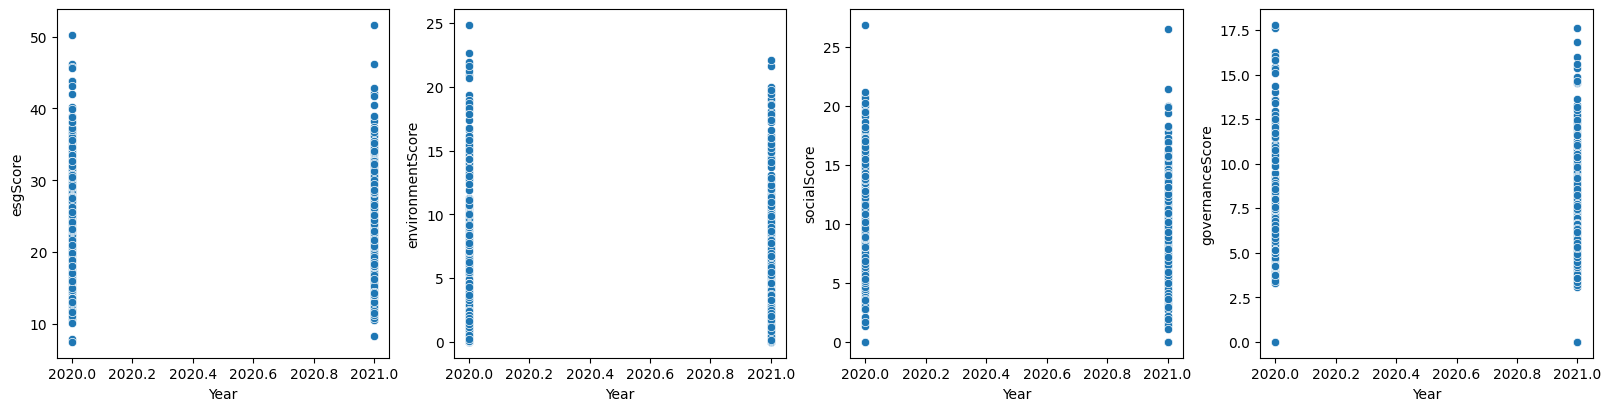

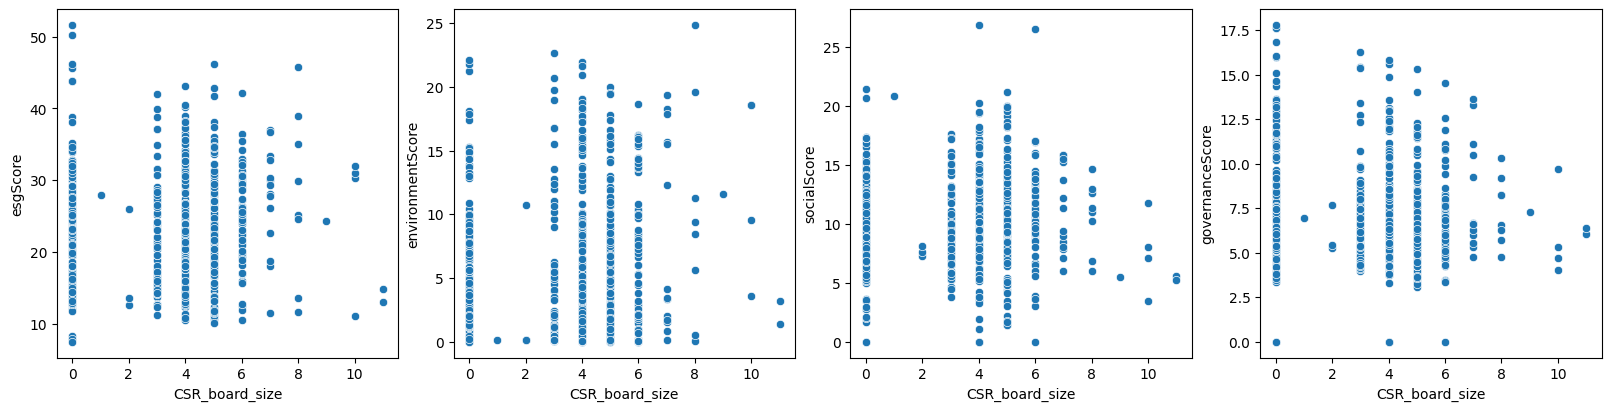

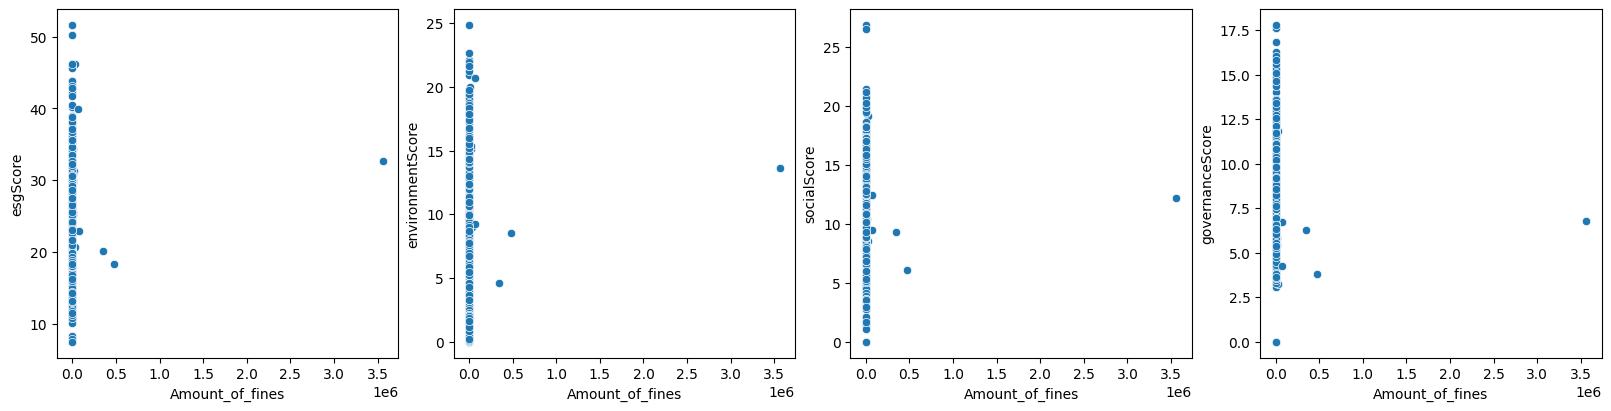

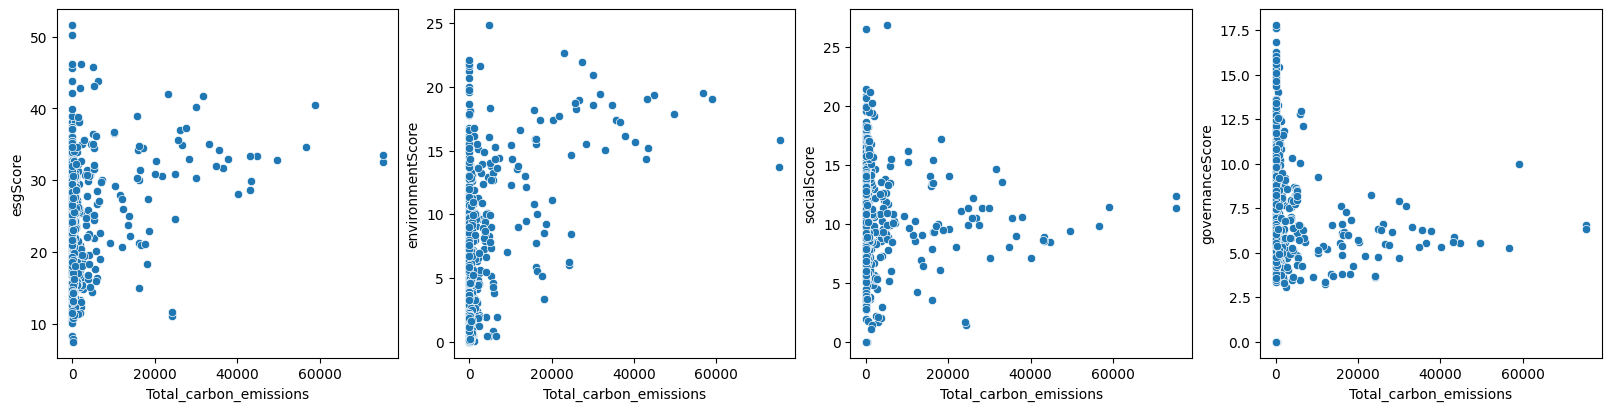

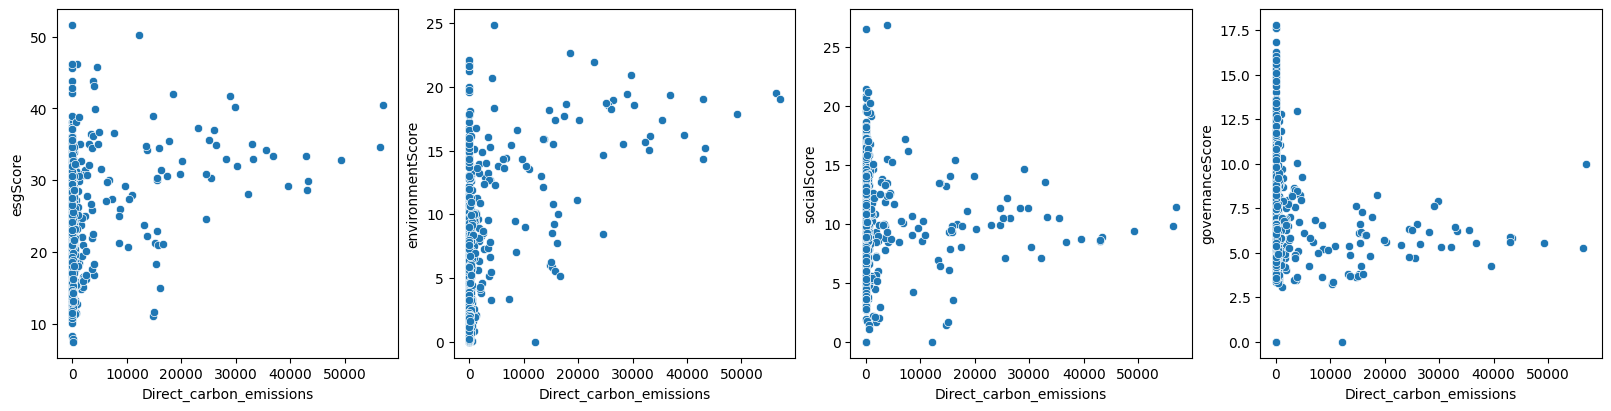

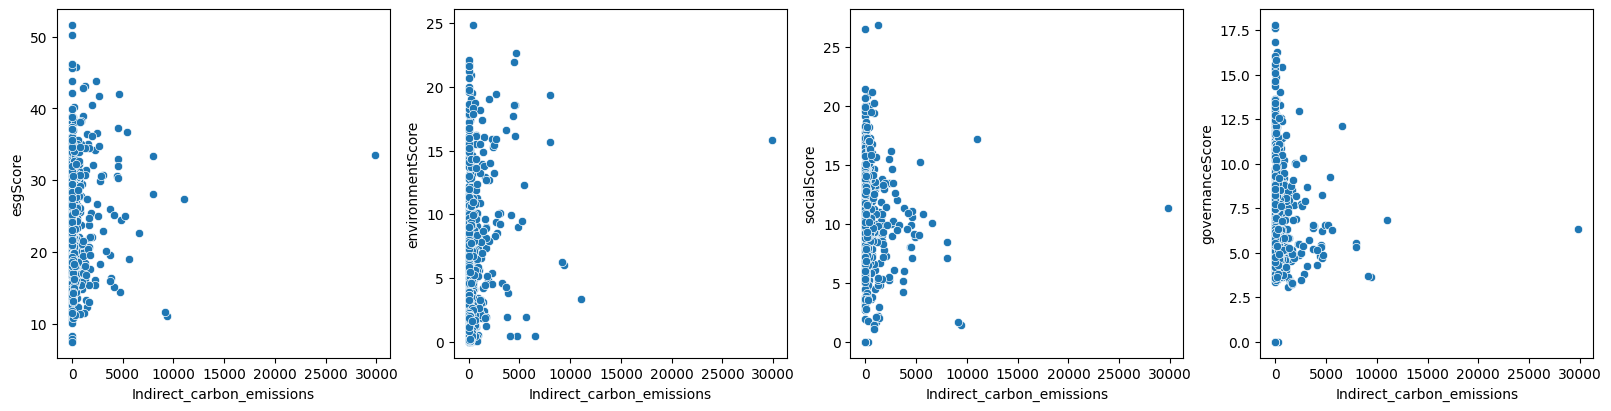

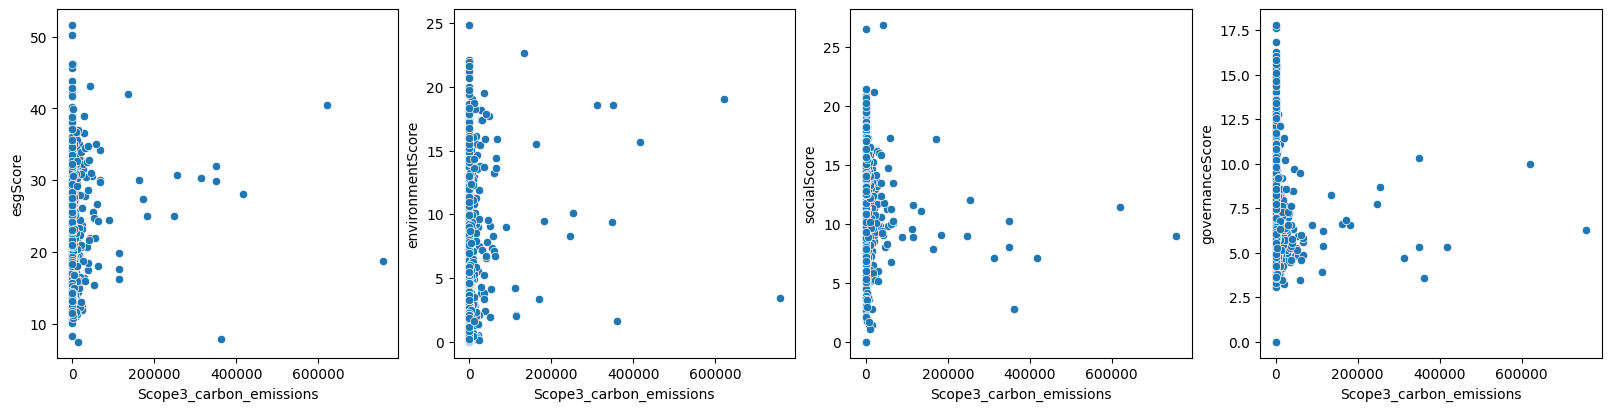

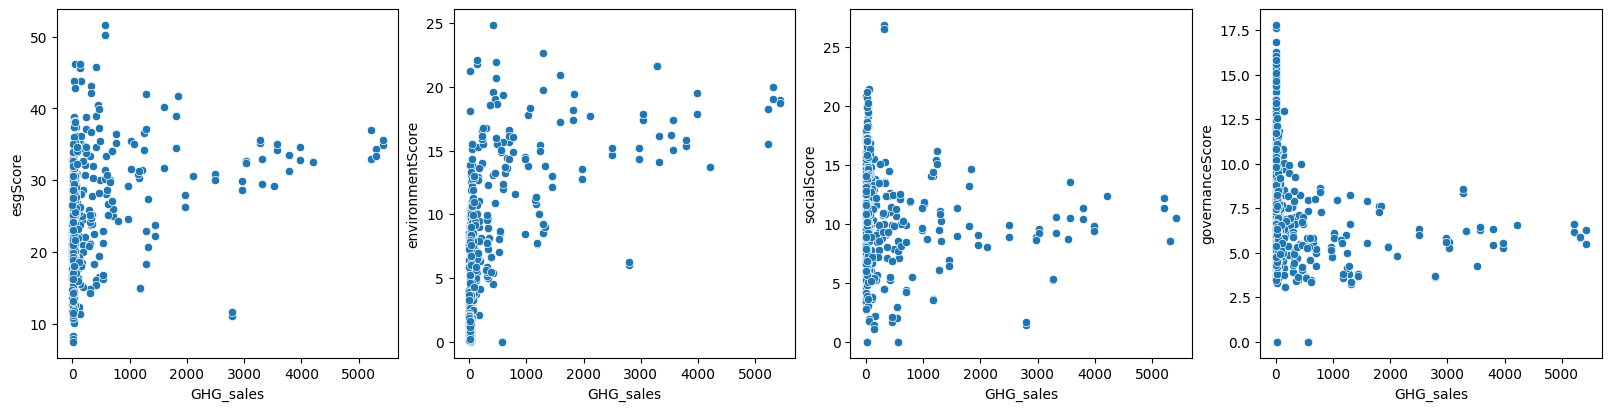

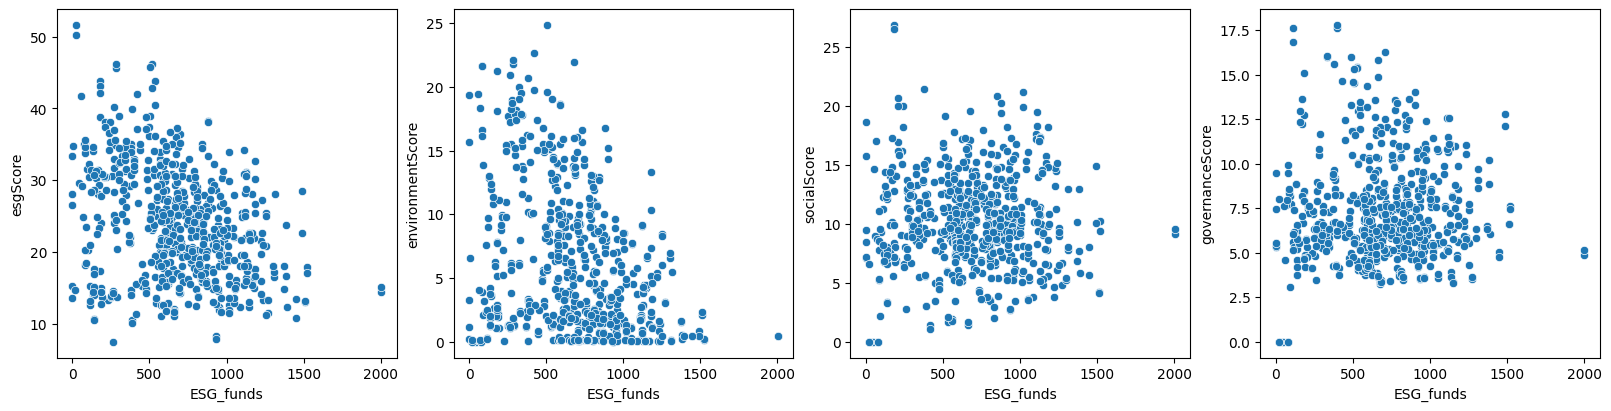

In [ ]:
for col in num_cols:#num_cols:
  if col in ["esgScore","environmentScore","socialScore","governanceScore","Integrated_reporting_framework","Controversy_level"]: continue
  visualize(col)

In [ ]:
# for col in ["GHG_sales", "ESG_funds", "Direct_carbon_emissions"]:
#   log_col(col)
#   visualize(col+"_log")
# for col in ["Scope3_carbon_emissions", "Indirect_carbon_emissions"]:
#   sqrt_col(col)
#   visualize(col+"_sqrt")
# for col in ["Total_carbon_emissions"]:
#   box_cox_col(col)
#   visualize(col+"_boxcox")

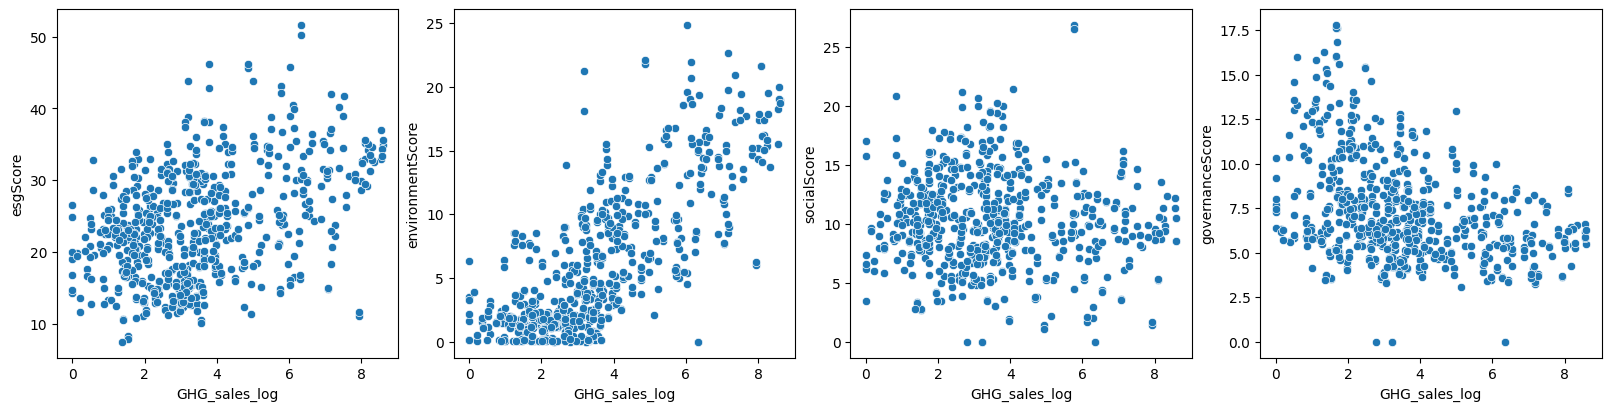

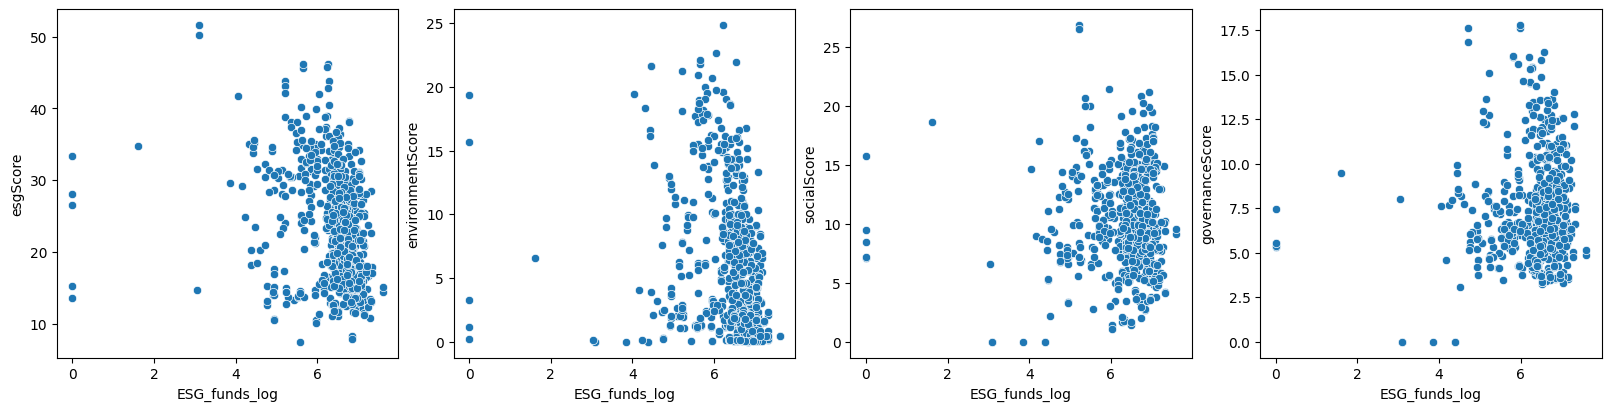

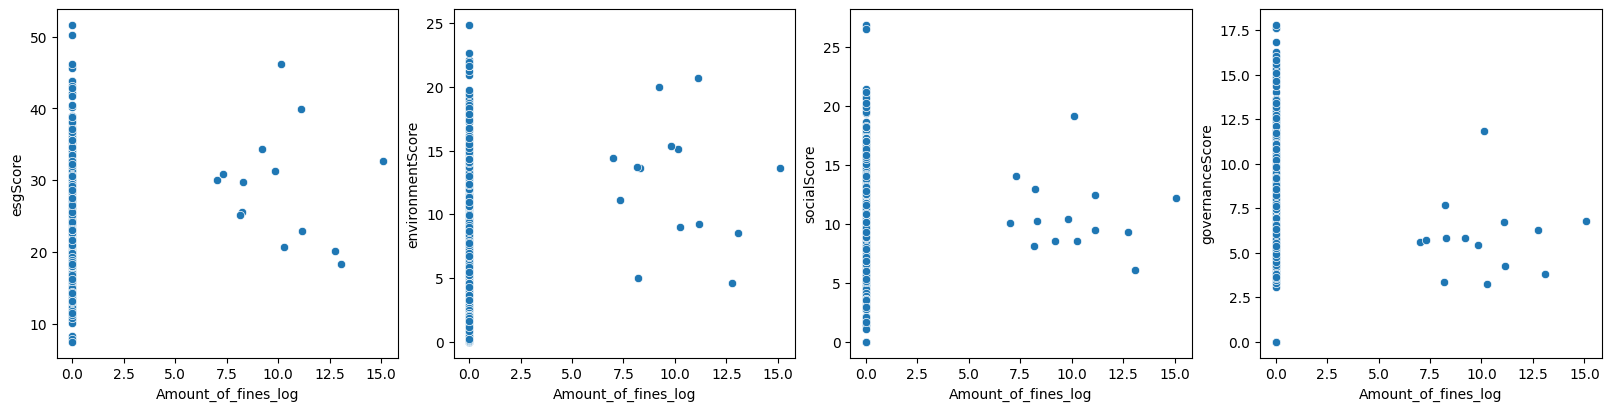

In [ ]:
for col in ["GHG_sales", "ESG_funds", "Amount_of_fines"]:#
  if col in ["esgScore","environmentScore","socialScore","governanceScore","Integrated_reporting_framework","Controversy_level"]: continue
  log_col(col)
  visualize(col+"_log")

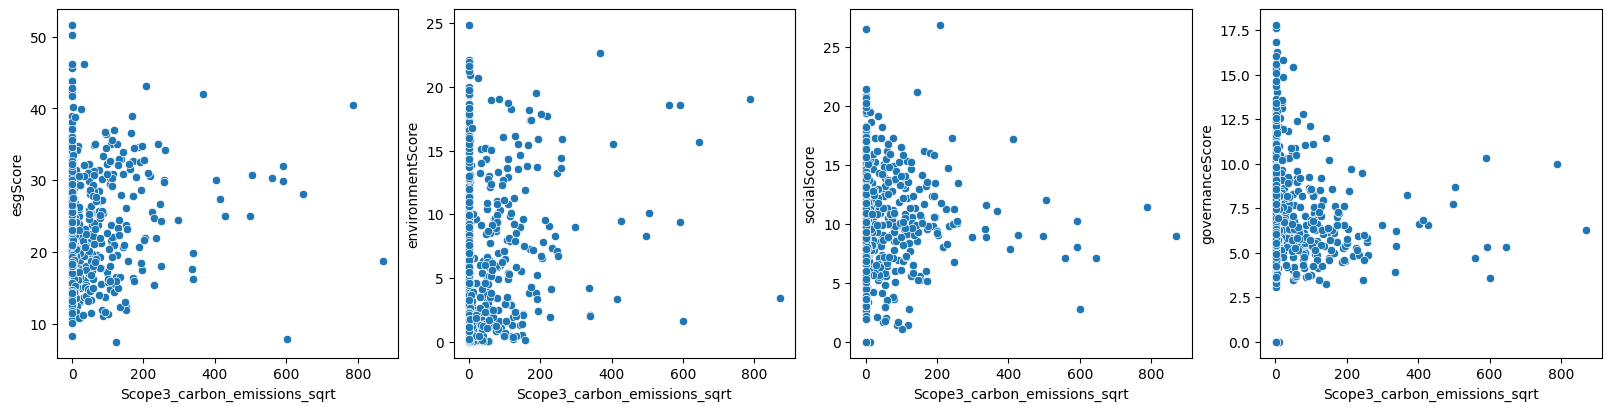

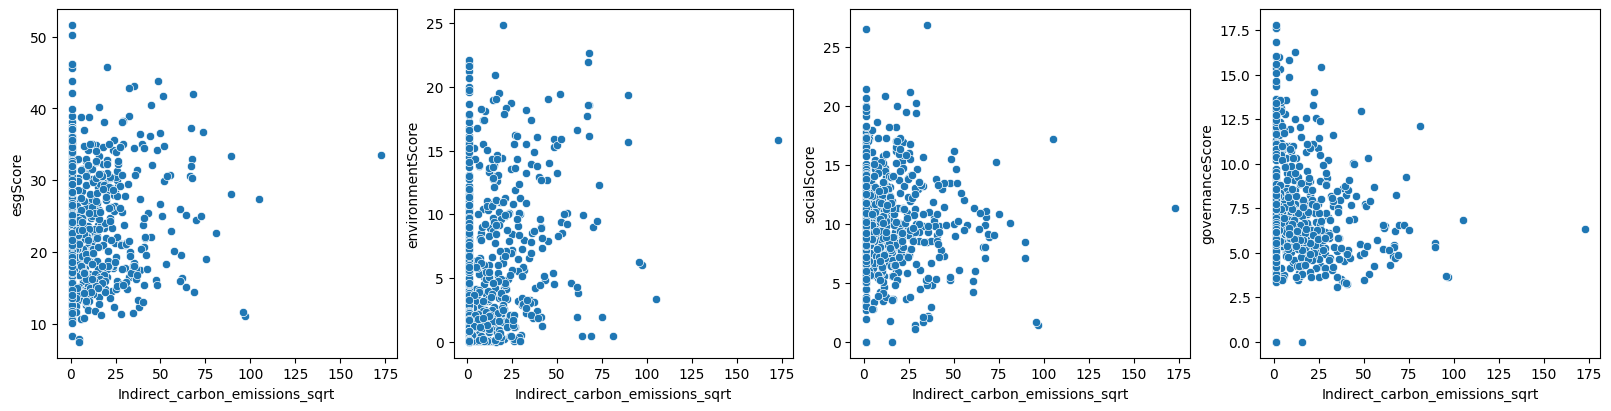

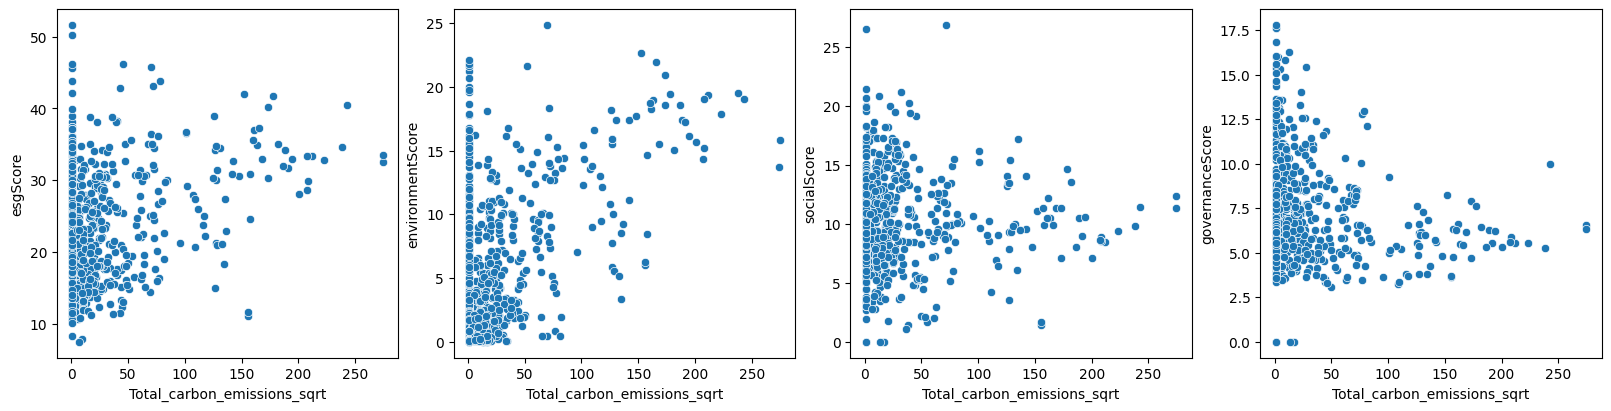

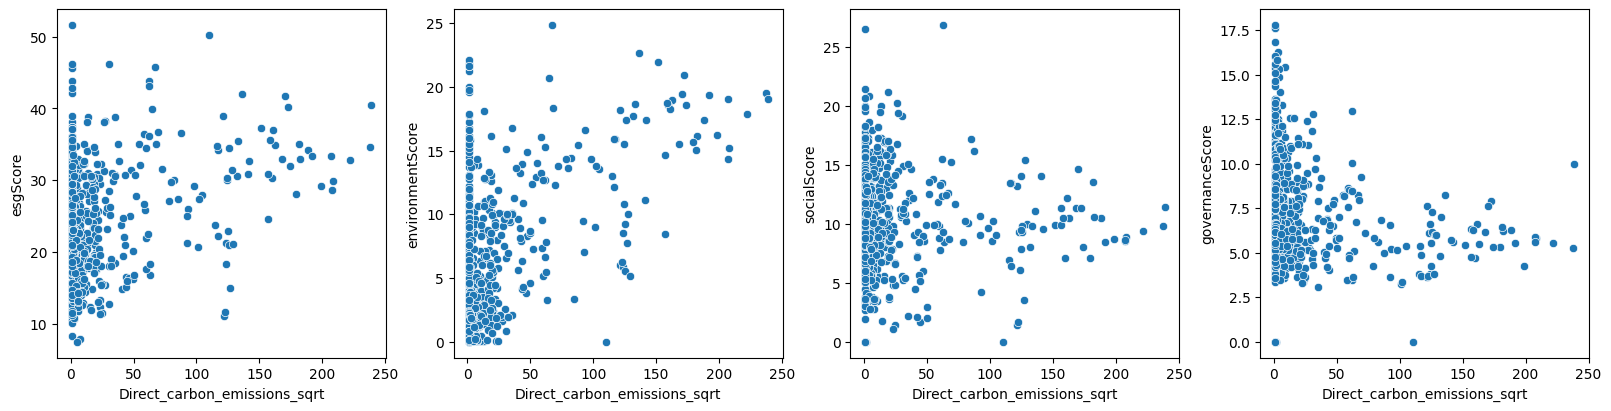

In [ ]:
for col in ["Scope3_carbon_emissions", "Indirect_carbon_emissions", "Total_carbon_emissions", "Direct_carbon_emissions"]:#
  if col in ["esgScore","environmentScore","socialScore","governanceScore","Integrated_reporting_framework","Controversy_level"]: continue
  sqrt_col(col)
  visualize(col+"_sqrt")

In [ ]:
# for col in num_cols: #["Total_carbon_emissions"]:#
#   if col in ["esgScore","environmentScore","socialScore","governanceScore","Integrated_reporting_framework","Controversy_level"]: continue
#   box_cox_col(col)
#   visualize(col+"_boxcox")

In [ ]:
# import scipy.stats as stats

# num_cols=['CSR_board_size',
#  'Amount_of_fines',
#  'Total_carbon_emissions',
#  'Direct_carbon_emissions',
#  'Indirect_carbon_emissions',
#  'Scope3_carbon_emissions',
#  'GHG_sales',
#  'Integrated_reporting_framework',
#  'Controversy_level',
#  'ESG_funds']

# column=num_cols[1]
# fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# # Original data Q-Q plot
# stats.probplot(df_train[column], dist="norm", plot=axes[0, 0])
# axes[0, 0].set_title('Original Data Q-Q Plot')

# # Log-transformed Q-Q plot
# stats.probplot(df_train[column+"_log"], dist="norm", plot=axes[0, 1])
# axes[0, 1].set_title('Log-Transformed Data Q-Q Plot')

# # Square root-transformed Q-Q plot
# stats.probplot(df_train[column+"_sqrt"], dist="norm", plot=axes[1, 0])
# axes[1, 0].set_title('Square Root-Transformed Data Q-Q Plot')

# plt.tight_layout()
# plt.show()

In [ ]:
df_train.corr(method="pearson").sort_values(by="esgScore",ascending=False)[["esgScore","environmentScore","socialScore","governanceScore"]]
#log: GHG_sales, ESG_funds, Amount_of_fines (boxcox)
#sqrt: Direct_carbon_sales_emissions, Total_carbon_emissions, Scope3_carbon_emissions, Indirect_carbon_emissions

esgScore  environmentScore  socialScore  \
esgScore                        1.000000          0.639415     0.610777   
environmentScore                0.639415          1.000000     0.032827   
socialScore                     0.610777          0.032827     1.000000   
GHG_sales_log                   0.410711          0.759055    -0.063751   
governanceScore                 0.362287         -0.191507     0.427244   
Direct_carbon_emissions_sqrt    0.315138          0.545312    -0.030614   
Total_carbon_emissions_sqrt     0.279399          0.516642    -0.019526   
Biodiversity                    0.237951          0.374294     0.010615   
EPA_fines                       0.149354          0.208393     0.042288   
Controversy_level               0.139551         -0.011307     0.361388   
CSR_board_size                  0.115497          0.188554     0.043673   
Amount_of_fines_log             0.099629          0.168114     0.018333   
Compliance_environmental_laws   0.091586          0.165903     0.055699   
CSR_commitee                    0.084088          0.154723     0.040249   
Scope3_carbon_emissions_sqrt    0.083534          0.211376    -0.009501   
Indirect_carbon_emissions_sqrt  0.081699          0.251806    -0.048184   
Water_treatment                 0.071629          0.207872    -0.028919   
Climate_change_policy           0.067237          0.144438     0.017537   
Net_zero_targets                0.062678          0.042884     0.076791   
Planning_zero_carbon            0.059068          0.077186     0.043572   
Energy_conservation             0.020123          0.072325    -0.000228   
E                               0.014549          0.023103     0.012719   
G                               0.006375         -0.055378     0.047955   
Waste_management               -0.003545          0.098744     0.040123   
Govt_collaboration             -0.010168         -0.097507     0.091370   
Integrated_reporting_framework -0.017824          0.012079    -0.026448   
Issue_green_bonds              -0.028766         -0.150910     0.028750   
S                              -0.028919         -0.087526     0.002299   
Year                           -0.043787         -0.003502    -0.064157   
Global_reporting_initiative    -0.070694          0.099311    -0.142427   
Green_innovation               -0.091996         -0.184808     0.112376   
Disclosure_of_R&D              -0.107872         -0.098644     0.037569   
Recycling                      -0.138898         -0.044201    -0.075703   
Renewal_energy                 -0.140894         -0.193178     0.012296   
ESG_funds_log                  -0.242383         -0.215205     0.022468   

                                governanceScore  
esgScore                               0.362287  
environmentScore                      -0.191507  
socialScore                            0.427244  
GHG_sales_log                         -0.370971  
governanceScore                        1.000000  
Direct_carbon_emissions_sqrt          -0.207604  
Total_carbon_emissions_sqrt           -0.189598  
Biodiversity                          -0.151867  
EPA_fines                             -0.070070  
Controversy_level                      0.134443  
CSR_board_size                        -0.075691  
Amount_of_fines_log                   -0.073118  
Compliance_environmental_laws         -0.121955  
CSR_commitee                          -0.083289  
Scope3_carbon_emissions_sqrt          -0.128747  
Indirect_carbon_emissions_sqrt        -0.156560  
Water_treatment                       -0.180052  
Climate_change_policy                 -0.005336  
Net_zero_targets                       0.001006  
Planning_zero_carbon                  -0.007765  
Energy_conservation                   -0.108460  
E                                     -0.030167  
G                                      0.036719  
Waste_management                      -0.102018  
Govt_collaboration                    -0.037200  
Integrated_reporting_framework 

In [ ]:
bool_cols=df_train.select_dtypes(include=['bool']).columns.tolist()
for col in bool_cols:
  df_train[col]=df_train[col].astype(int)

In [ ]:
high_vif_cols=["Year","E","Energy_conservation","G","CSR_commitee","Waste_management","S","ESG_funds_log"] #drop columns which causes high VIF
cols=["esgScore","governanceScore","environmentScore","socialScore"]+high_vif_cols
vif = pd.DataFrame()
vif['features'] = df_train.drop(cols,axis=1).columns
vif['vif_value'] = [variance_inflation_factor(df_train.drop(cols,axis=1).values, i) for i in range(df_train.drop(cols,axis=1).shape[1])]
for col in bool_cols:
  if col in df_train.columns:
    df_train[col]=df_train[col].astype(bool)
df_train.drop(high_vif_cols,axis=1,inplace=True)
df_test.drop(high_vif_cols,axis=1,inplace=True)
vif.sort_values(by="vif_value", ascending=False)


features  vif_value
21     Total_carbon_emissions_sqrt   9.697955
17                   GHG_sales_log   7.896861
5                  Water_treatment   7.013153
22    Direct_carbon_emissions_sqrt   6.648927
15               Controversy_level   6.096516
11           Climate_change_policy   5.399604
20  Indirect_carbon_emissions_sqrt   3.691065
13     Global_reporting_initiative   3.645216
0                   CSR_board_size   3.019446
7                     Biodiversity   2.860572
8                 Green_innovation   2.714591
9                 Net_zero_targets   2.211478
4               Govt_collaboration   2.187042
6                        Recycling   2.057087
12                  Renewal_energy   2.016541
2                        EPA_fines   1.873637
10               Disclosure_of_R&D   1.824534
19    Scope3_carbon_emissions_sqrt   1.784167
18             Amount_of_fines_log   1.711672
1    Compliance_environmental_laws   1.507166
16            Planning_zero_carbon   1.380406
3                Issue_green_bonds   1.307960
14  Integrated_reporting_framework   1.112601

<Axes: >

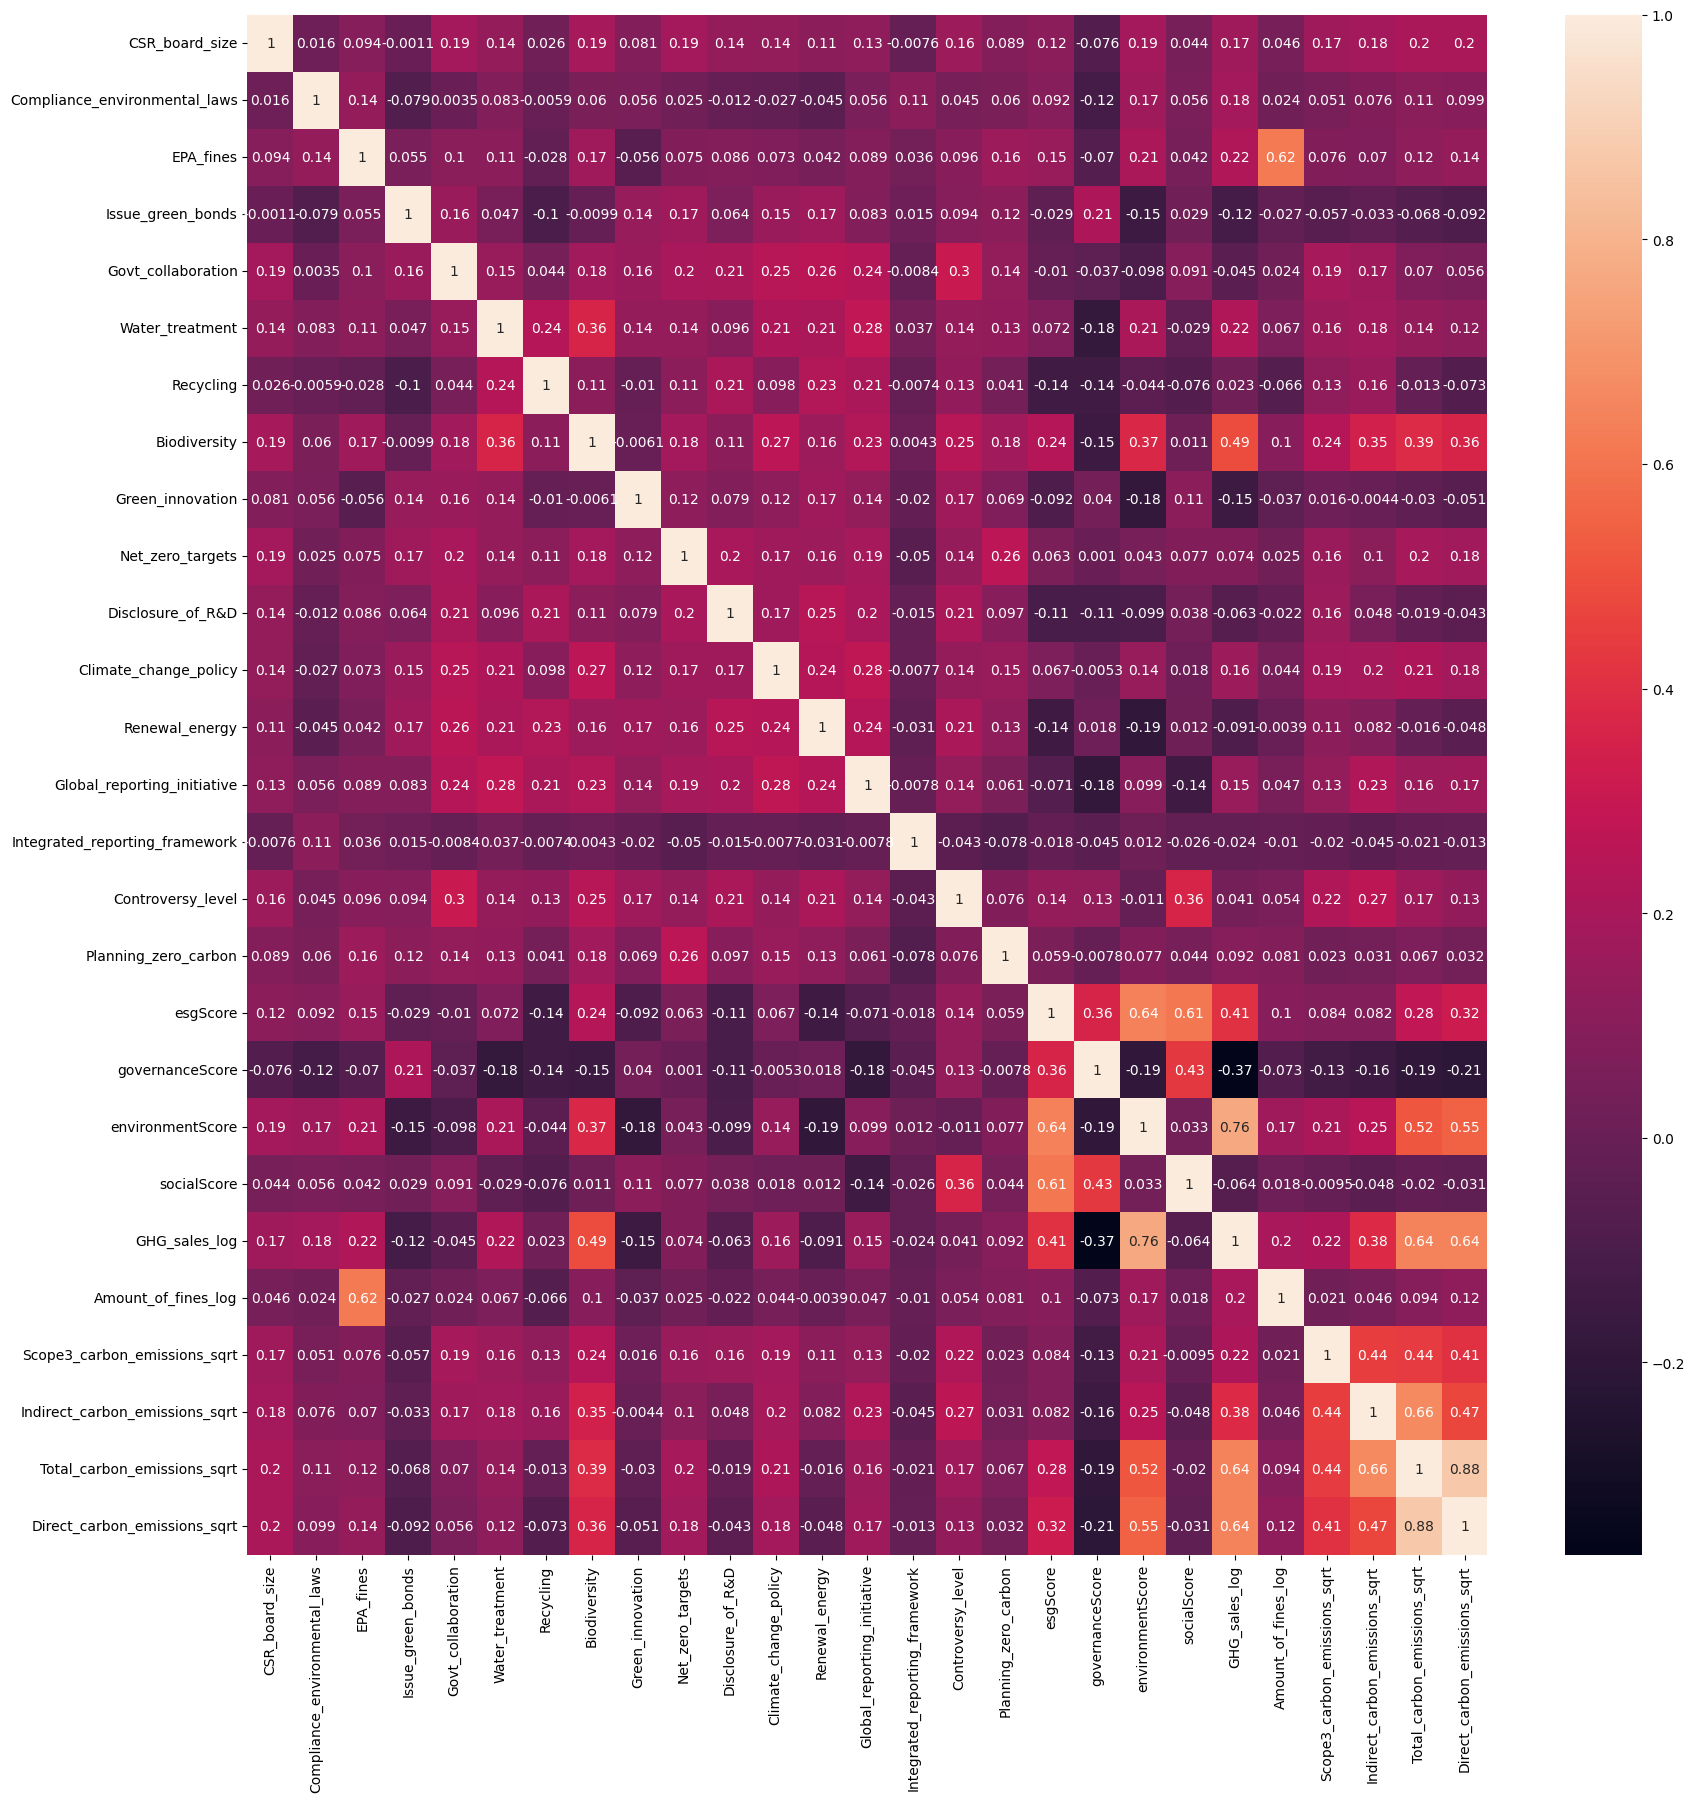

In [ ]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(df_train.corr(method="pearson"),ax=ax,annot=True)

<Axes: >

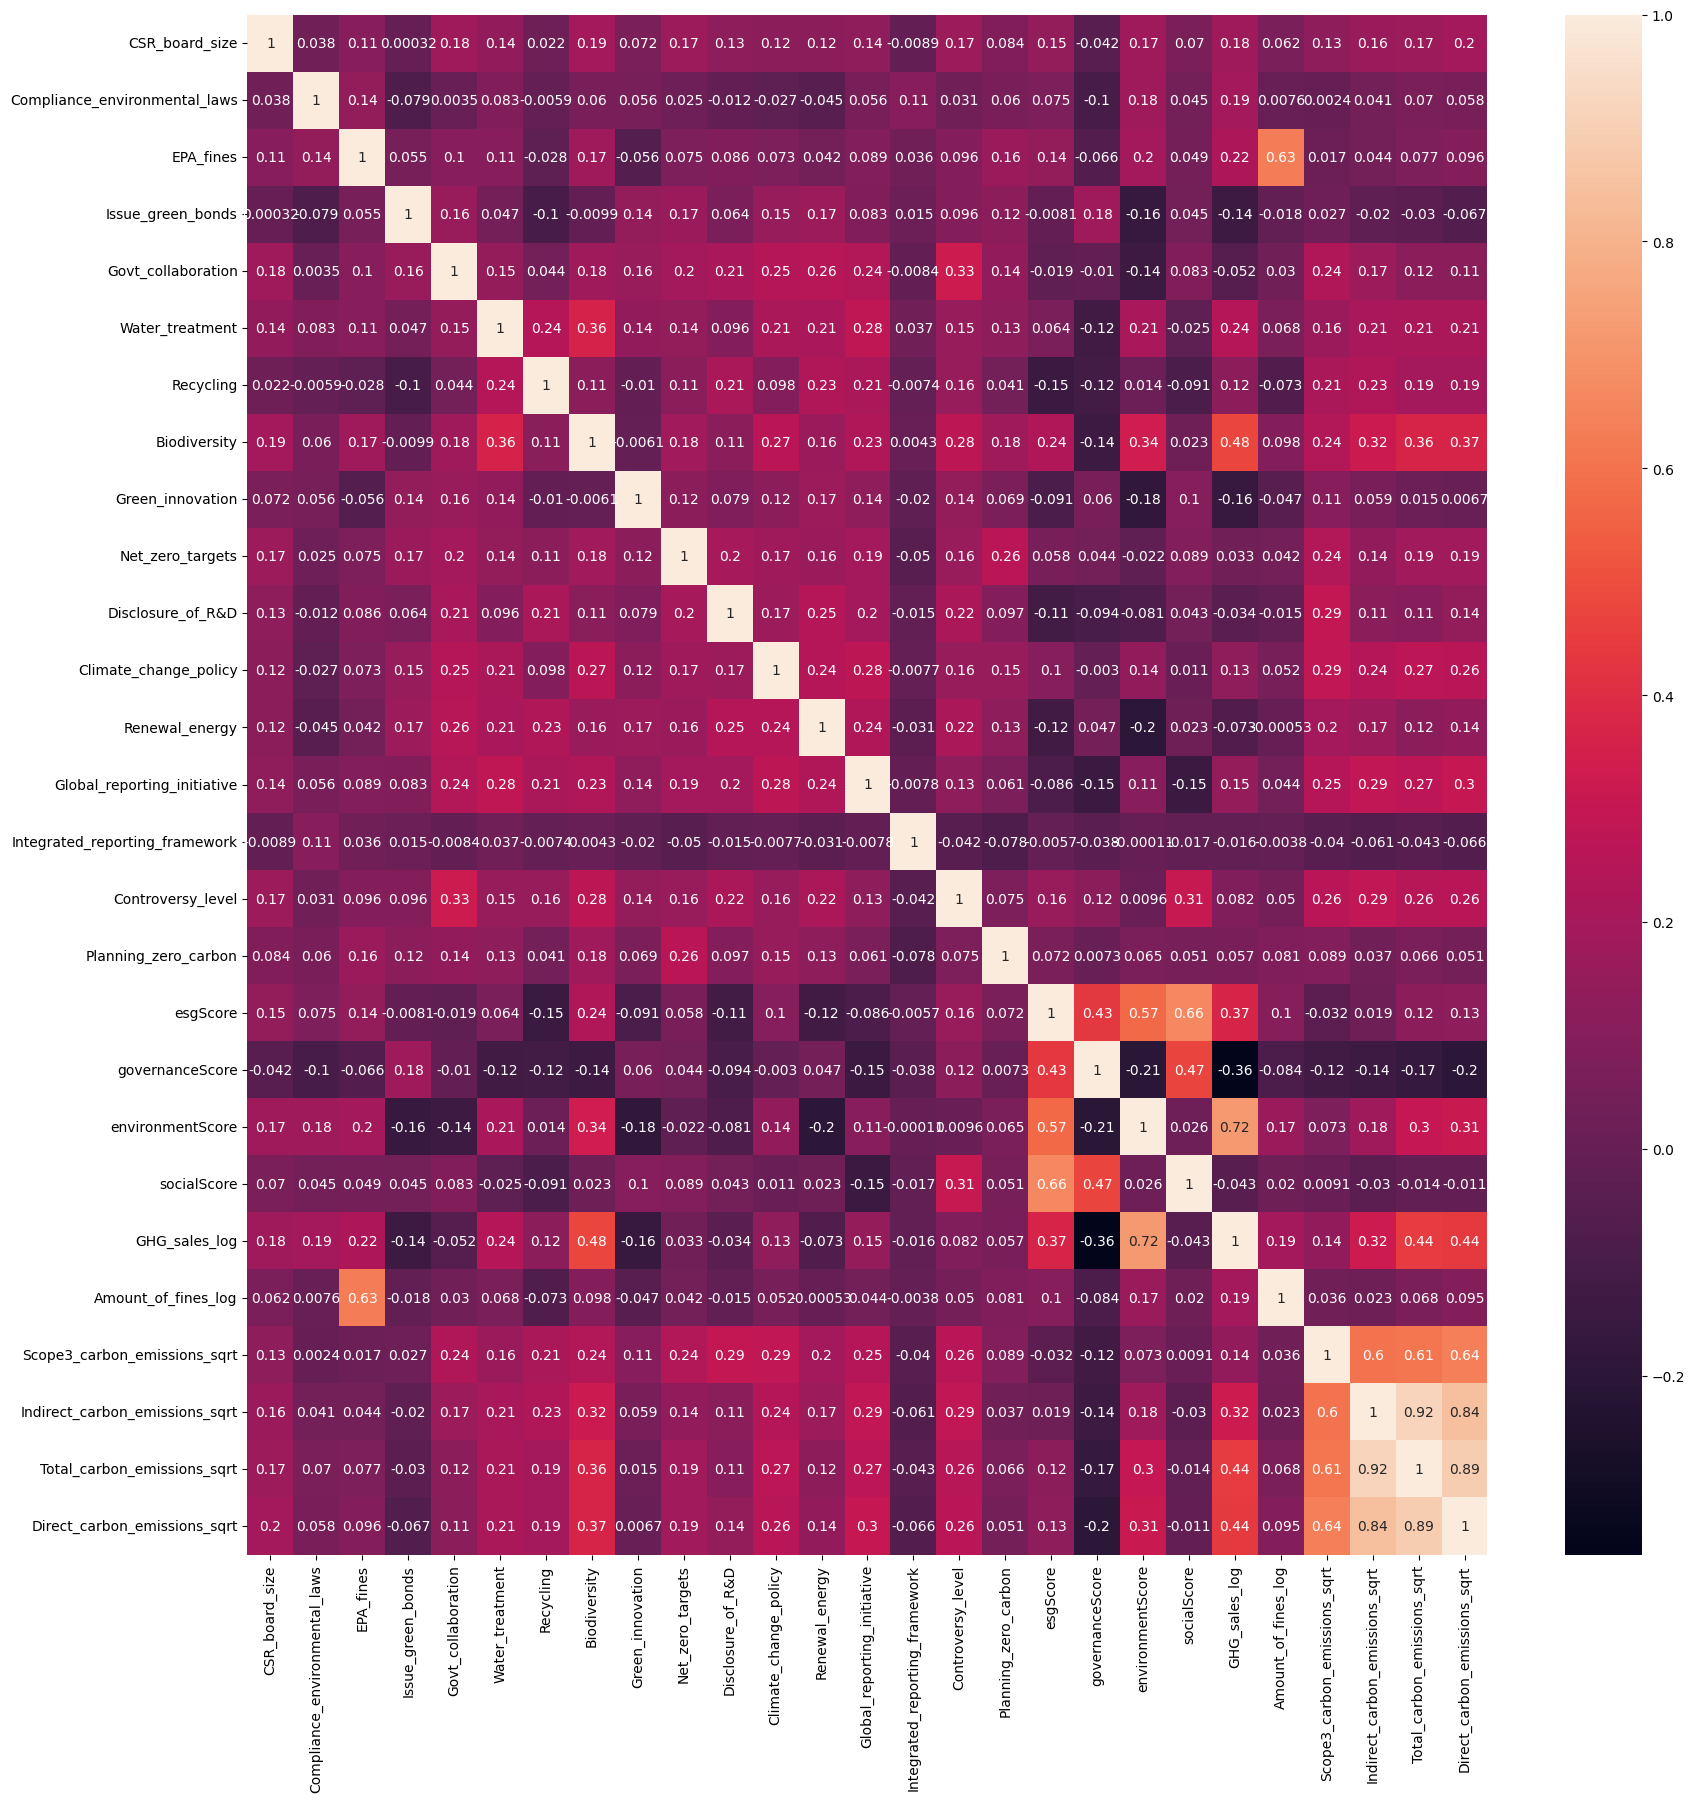

In [ ]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(df_train.corr(method="spearman"),ax=ax,annot=True)

#Data Modelling
TODO:
Capping: By applying a threshold, values beyond certain limits are capped to a maximum or minimum value. This method retains outliers in the dataset but limits their influence.
Transformation: Applying transformations such as logarithmic, square root, or Box-Cox can reduce the effect of outliers by adjusting the scale of data points.

In [ ]:
#SMOTE leads to worse performance
# df_train['esgScore_binned'] = pd.cut(df_train['esgScore'], bins=5, labels=False)
# smote = SMOTE(random_state=42)
# df_train, _ = smote.fit_resample(df_train.drop("esgScore_binned",axis=1), df_train['esgScore_binned'])
# df_train

In [ ]:
num_cols = X_train.select_dtypes(include=['int64','float64']).columns.tolist()
num_cols

['CSR_board_size',
 'Controversy_level',
 'GHG_sales_log',
 'Amount_of_fines_log',
 'Scope3_carbon_emissions_sqrt',
 'Indirect_carbon_emissions_sqrt',
 'Total_carbon_emissions_sqrt',
 'Direct_carbon_emissions_sqrt']

In [ ]:
def split_data(target, prod=False):
  cols=["esgScore","governanceScore","environmentScore","socialScore"]
  sampled_df_train=df_train.copy()
  # sampled_df_train[target+'_binned'] = pd.cut(sampled_df_train[target], bins=5, labels=False)
  # smote = SMOTE(random_state=42)
  # sampled_df_train, _ = smote.fit_resample(sampled_df_train.drop(target+"_binned",axis=1), sampled_df_train[target+'_binned'])
  X_train, y_train = sampled_df_train.drop(cols,axis=1), sampled_df_train[target]
  X_test, y_test = df_test.drop(cols,axis=1), df_test[target]
  return X_train, y_train, X_test,y_test

def train_model(type, model, res, model_dict, k=25,prod=False):
  print(type, ",", model)
  if type=="E":
    X_train, y_train, X_test,y_test = split_data("environmentScore",prod)
  elif type=="S":
    X_train, y_train, X_test,y_test = split_data("socialScore",prod)
  elif type=="G":
    X_train, y_train, X_test,y_test = split_data("governanceScore",prod)
  n_cols=X_train.shape[1]
  if model==LinearRegression:
    param_grid = {
       'rfe__n_features_to_select':[15,20,n_cols]
        }
  elif model==Lasso:
    param_grid = {
        'rfe__n_features_to_select':[15,20,n_cols],
        'estimator__max_iter': [1000,2000], #increase doesnt help
        'estimator__alpha': [1e-3,1e-2,20]#[1e-3,1e-2, 1, 5, 10, 20]
        }
  elif model==Ridge:
    param_grid = {
        'rfe__n_features_to_select':[15,20,n_cols],
        'estimator__max_iter': [1000,2000],
        'estimator__alpha': [1e-3,1e-2,20],#[1e-3,1e-2, 1, 5, 10, 20],
        'estimator__random_state':[42]
        }
  elif model==RandomForestRegressor:
    param_grid = {
        'rfe__n_features_to_select': [15,20,n_cols],
        'estimator__n_estimators': [100, 200],
        'estimator__max_depth' : [6],
        'estimator__random_state':[42]
    }
  elif model==XGBRegressor:
    param_grid = {
        'rfe__n_features_to_select': [15,20,n_cols],
        'estimator__learning_rate': [0.1],
        'estimator__n_estimators': [100, 500],
        'estimator__max_depth': [5],
        'estimator__random_state':[42]
    }

  # if model in [LinearRegression,Lasso,Ridge]:
  #   fs = SelectKBest(score_func=f_regression, k=k)
  #   # apply feature selection
  #   fs.fit(X_train, y_train)
  #   cols_idxs = fs.get_support(indices=True)
  #   X_train = X_train.iloc[:,cols_idxs]

  #if prod: param_grid['rfe__n_features_to_select']=[15]

  num_cols = X_train.select_dtypes(include=['int64','float64']).columns.tolist()
  #bool_cols = X_train.select_dtypes(include=['bool']).columns.tolist()

  num_categorical_transformer = Pipeline(steps=[
      ('num', StandardScaler()) #MinMaxScaler())
  ])

  # Bundle preprocessing for numerical and categorical data
  preprocessor = ColumnTransformer(
      transformers=[
          ('scaling',num_categorical_transformer, num_cols),
      ], remainder='passthrough')

  pipeline = Pipeline([
      ('preprocessor',preprocessor),
      ('rfe',RFE(estimator=model())),
      ("estimator", model())
  ])

  grid_search = GridSearchCV(pipeline, param_grid, cv=KFold(n_splits=5), scoring='neg_root_mean_squared_error')
  grid_search.fit(X_train, y_train)

  best_model=grid_search.best_estimator_
  model_dict[model]=best_model
  print("Best Parameters:", grid_search.best_params_)

  # y_pred = best_model.predict(X_train)
  # print("Training RMSE: ",mean_squared_error(y_train,y_pred,squared=False))
  # R2=r2_score(y_train, y_pred)
  # print("Training R2 score :", R2)

  if prod: return
  # Make predictions on the test set
  y_pred = best_model.predict(X_test)
  print("RMSE: ",mean_squared_error(y_test,y_pred,squared=False))
  R2=r2_score(y_test, y_pred)
  if model in [LinearRegression,Lasso,Ridge]: res[model]=R2
  print("R2 score :", R2)
  n = len(X_train)
  p = len(X_train.columns)
  adj_R2 = 1- ((1-R2) * (n-1)/(n-p-1))
  print("Adjusted R2 score :", adj_R2)
  plt.scatter(y_pred, y_test)
  plt.plot(np.linspace(0,30), np.linspace(0,30), c = 'orange', linestyle='--')
  plt.xlabel('prediction')
  plt.ylabel('true values')
  plt.xlim(0,30)
  plt.ylim(0,30)
  plt.title('Predicted vs True values')
  plt.show()

E , <class 'sklearn.linear_model._base.LinearRegression'>
Best Parameters: {'rfe__n_features_to_select': 20}
RMSE:  2.7336716339094793
R2 score : 0.7451296652419523
Adjusted R2 score : 0.7354881887626183


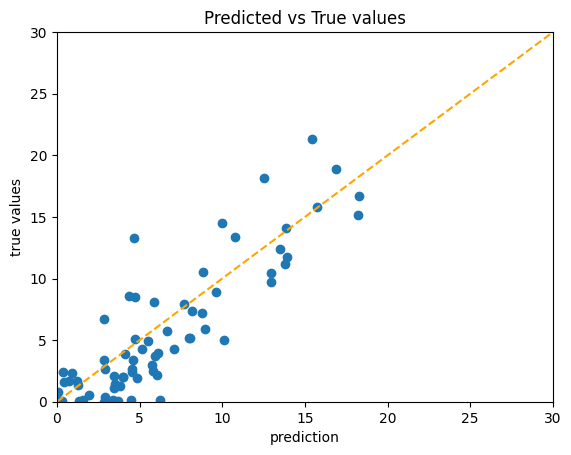

E , <class 'sklearn.linear_model._coordinate_descent.Lasso'>
Best Parameters: {'estimator__alpha': 0.01, 'estimator__max_iter': 1000, 'rfe__n_features_to_select': 23}
RMSE:  2.744700430350622
R2 score : 0.7430690057124074
Adjusted R2 score : 0.733349576652186


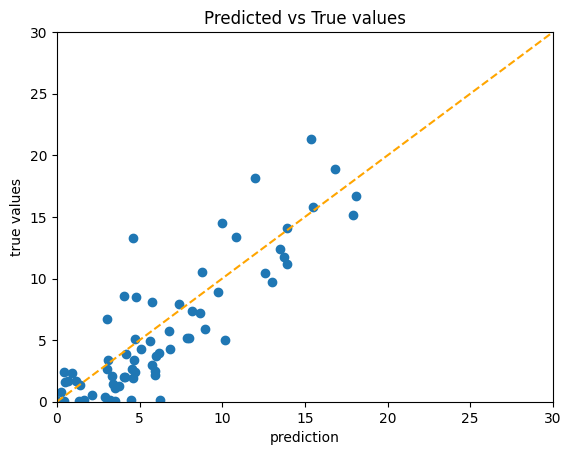

E , <class 'sklearn.linear_model._ridge.Ridge'>
Best Parameters: {'estimator__alpha': 20, 'estimator__max_iter': 1000, 'estimator__random_state': 42, 'rfe__n_features_to_select': 23}
RMSE:  2.7470195357501566
R2 score : 0.742634640068603
Adjusted R2 score : 0.7328987794133035


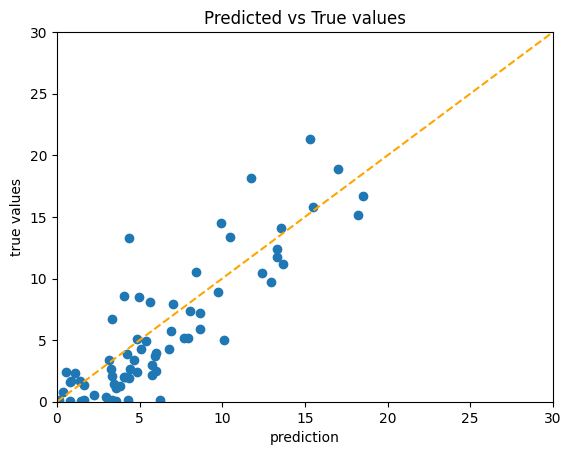

E , <class 'sklearn.ensemble._forest.RandomForestRegressor'>
Best Parameters: {'estimator__max_depth': 6, 'estimator__n_estimators': 200, 'estimator__random_state': 42, 'rfe__n_features_to_select': 20}
RMSE:  2.4273813594696736
R2 score : 0.7990432391672317
Adjusted R2 score : 0.7914412564383606


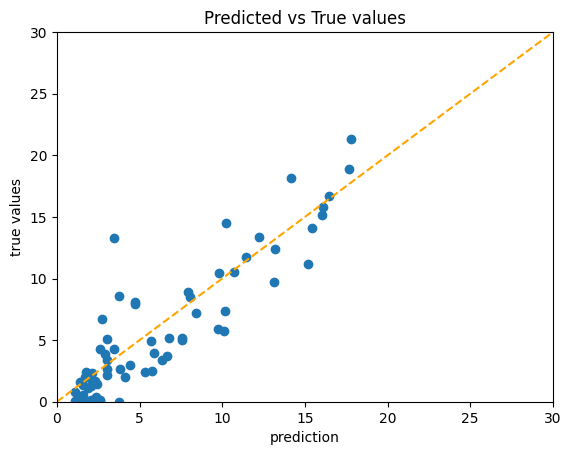

E , <class 'xgboost.sklearn.XGBRegressor'>
Best Parameters: {'estimator__learning_rate': 0.1, 'estimator__max_depth': 5, 'estimator__n_estimators': 500, 'estimator__random_state': 42, 'rfe__n_features_to_select': 15}
RMSE:  1.837183675500579
R2 score : 0.8848850438710111
Adjusted R2 score : 0.8805303662542895


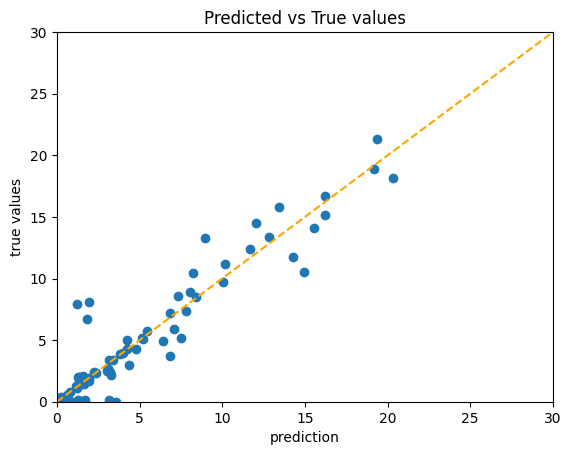

In [ ]:
r2_e={}
model_e={}
train_model("E",LinearRegression,r2_e,model_e)
train_model("E",Lasso,r2_e,model_e)
train_model("E",Ridge,r2_e,model_e)
train_model("E",RandomForestRegressor,r2_e,model_e)
train_model("E",XGBRegressor,r2_e,model_e)
# E , <class 'sklearn.linear_model._base.LinearRegression'>
# Best Parameters: {}
# RMSE:  2.7375791237457814
# R2 score : 0.7444005249907153
# Adjusted R2 score : 0.7342944501962789

# E , <class 'sklearn.linear_model._coordinate_descent.Lasso'>
# Best Parameters: {'estimator__alpha': 0.01, 'estimator__max_iter': 1000}
# RMSE:  2.737861740540636
# R2 score : 0.7443477481175413
# Adjusted R2 score : 0.7342395865933584

# E , <class 'sklearn.linear_model._ridge.Ridge'>
# Best Parameters: {'estimator__alpha': 20, 'estimator__max_iter': 1000}
# RMSE:  2.7347801839694066
# R2 score : 0.7449229148714741
# Adjusted R2 score : 0.7348374947016477

# E , <class 'sklearn.ensemble._forest.RandomForestRegressor'>
# Best Parameters: {'estimator__max_depth': 6, 'estimator__n_estimators': 200}
# RMSE:  2.307924204887013
# R2 score : 0.8183356619813602
# Adjusted R2 score : 0.8111528874962739

# E , <class 'xgboost.sklearn.XGBRegressor'>
# Best Parameters: {'estimator__learning_rate': 0.1, 'estimator__max_depth': 5, 'estimator__n_estimators': 500}
# RMSE:  1.6086891627068334
# R2 score : 0.9117385884129338
# Adjusted R2 score : 0.9082488456154221



S , <class 'sklearn.linear_model._base.LinearRegression'>
Best Parameters: {'rfe__n_features_to_select': 15}
RMSE:  3.9729583991719215
R2 score : 0.1288522260063253
Adjusted R2 score : 0.09589762271380142


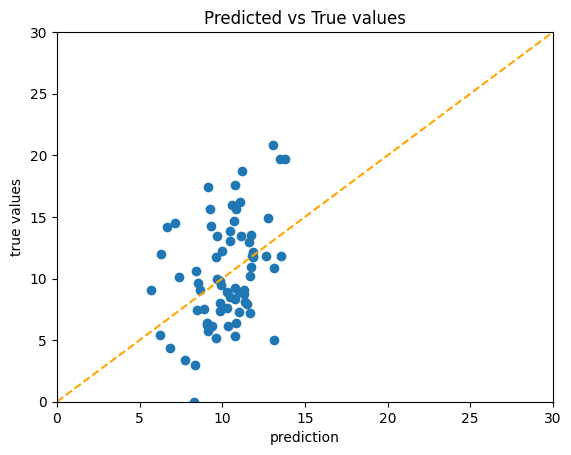

S , <class 'sklearn.linear_model._coordinate_descent.Lasso'>
Best Parameters: {'estimator__alpha': 0.01, 'estimator__max_iter': 1000, 'rfe__n_features_to_select': 15}
RMSE:  4.029588930644621
R2 score : 0.10384055630132671
Adjusted R2 score : 0.069939787871936


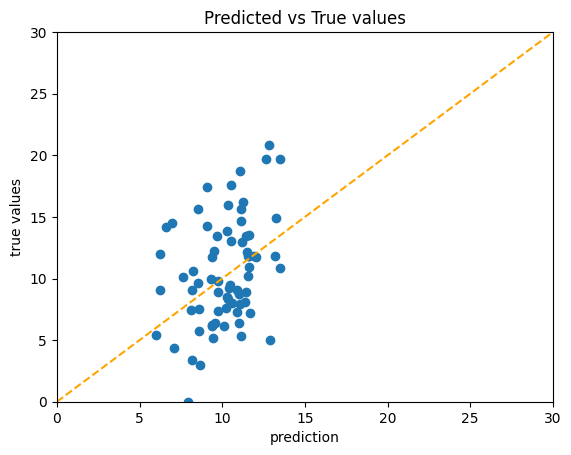

S , <class 'sklearn.linear_model._ridge.Ridge'>
Best Parameters: {'estimator__alpha': 20, 'estimator__max_iter': 1000, 'estimator__random_state': 42, 'rfe__n_features_to_select': 15}
RMSE:  3.9665749512265562
R2 score : 0.13164936530278726
Adjusted R2 score : 0.09880057484549132


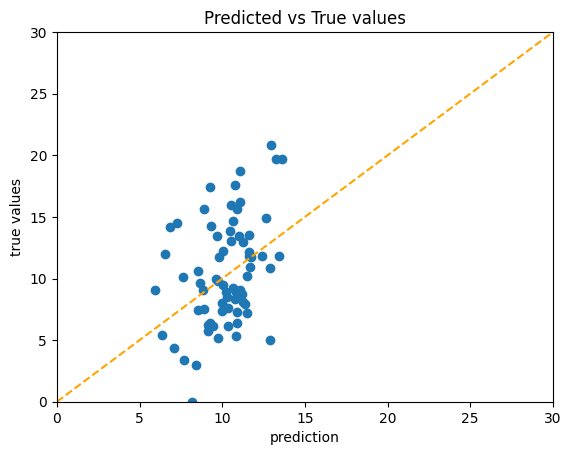

S , <class 'sklearn.ensemble._forest.RandomForestRegressor'>
Best Parameters: {'estimator__max_depth': 6, 'estimator__n_estimators': 100, 'estimator__random_state': 42, 'rfe__n_features_to_select': 15}
RMSE:  3.583637908496528
R2 score : 0.2912190440894654
Adjusted R2 score : 0.26440660661258664


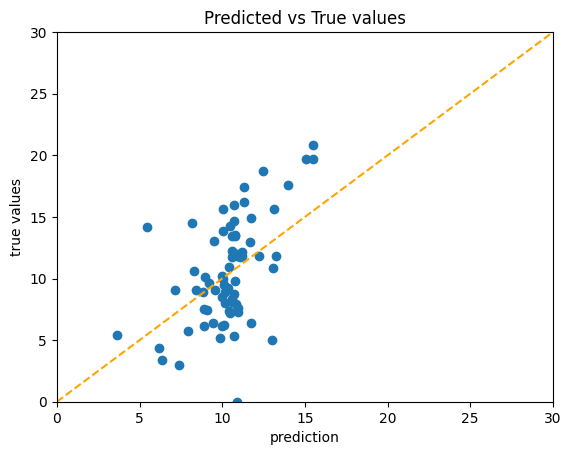

S , <class 'xgboost.sklearn.XGBRegressor'>
Best Parameters: {'estimator__learning_rate': 0.1, 'estimator__max_depth': 5, 'estimator__n_estimators': 500, 'estimator__random_state': 42, 'rfe__n_features_to_select': 23}
RMSE:  2.5601272172620853
R2 score : 0.6382680333961198
Adjusted R2 score : 0.6245840938699863


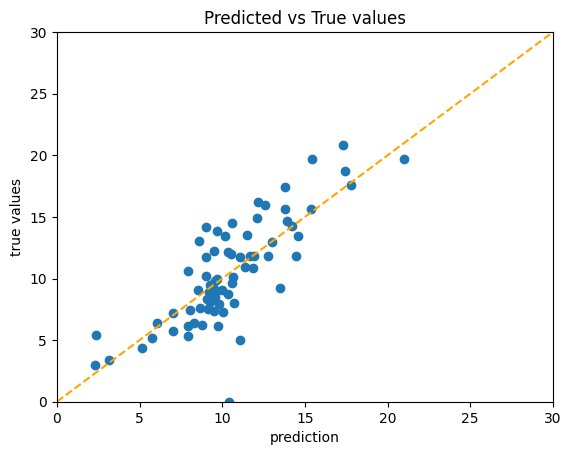

In [ ]:
r2_s={}
model_s={}
train_model("S",LinearRegression,r2_s,model_s)
train_model("S",Lasso,r2_s,model_s)
train_model("S",Ridge,r2_s,model_s)
train_model("S",RandomForestRegressor,r2_s,model_s)
train_model("S",XGBRegressor,r2_s,model_s)
# S , <class 'sklearn.linear_model._base.LinearRegression'>
# Best Parameters: {}
# RMSE:  3.9785700147078193
# R2 score : 0.1263895781196922
# Adjusted R2 score : 0.09184814463513302

# S , <class 'sklearn.linear_model._coordinate_descent.Lasso'>
# Best Parameters: {'estimator__alpha': 0.01, 'estimator__max_iter': 1000}
# RMSE:  3.9782593814707847
# R2 score : 0.12652598986478314
# Adjusted R2 score : 0.0919899499253346

# S , <class 'sklearn.linear_model._ridge.Ridge'>
# Best Parameters: {'estimator__alpha': 20, 'estimator__max_iter': 1000}
# RMSE:  3.965238354912463
# R2 score : 0.1322344739799075
# Adjusted R2 score : 0.09792414016692197

# S , <class 'sklearn.ensemble._forest.RandomForestRegressor'>
# Best Parameters: {'estimator__max_depth': 6, 'estimator__n_estimators': 100}
# RMSE:  3.5966102364117845
# R2 score : 0.28607835701963835
# Adjusted R2 score : 0.25785081265138676

# S , <class 'xgboost.sklearn.XGBRegressor'>
# Best Parameters: {'estimator__learning_rate': 0.1, 'estimator__max_depth': 5, 'estimator__n_estimators': 500}
# RMSE:  2.3975283622438224
# R2 score : 0.6827575442750762
# Adjusted R2 score : 0.6702141852348815

G , <class 'sklearn.linear_model._base.LinearRegression'>
Best Parameters: {'rfe__n_features_to_select': 15}
RMSE:  2.788880296259724
R2 score : 0.10937488000846418
Adjusted R2 score : 0.07568346921931057


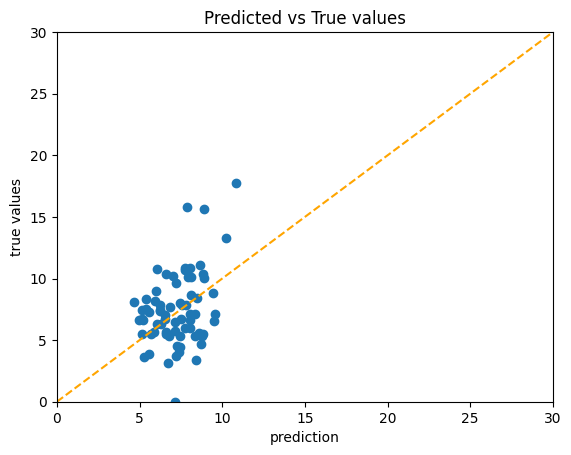

G , <class 'sklearn.linear_model._coordinate_descent.Lasso'>
Best Parameters: {'estimator__alpha': 0.01, 'estimator__max_iter': 1000, 'rfe__n_features_to_select': 23}
RMSE:  2.80312761666219
R2 score : 0.10025191181698656
Adjusted R2 score : 0.0662153887442739


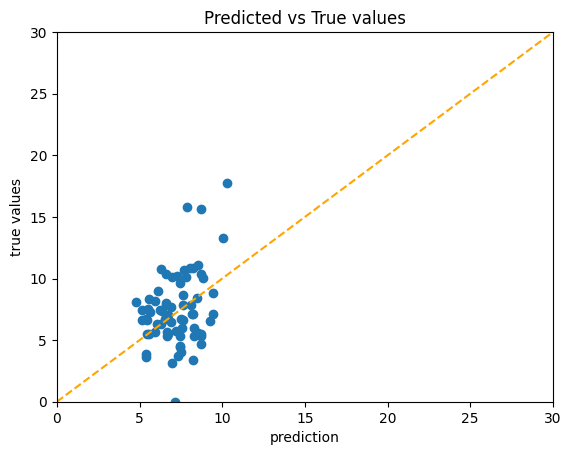

G , <class 'sklearn.linear_model._ridge.Ridge'>
Best Parameters: {'estimator__alpha': 20, 'estimator__max_iter': 1000, 'estimator__random_state': 42, 'rfe__n_features_to_select': 20}
RMSE:  2.8238416435847853
R2 score : 0.08690520036812832
Adjusted R2 score : 0.05236378525047525


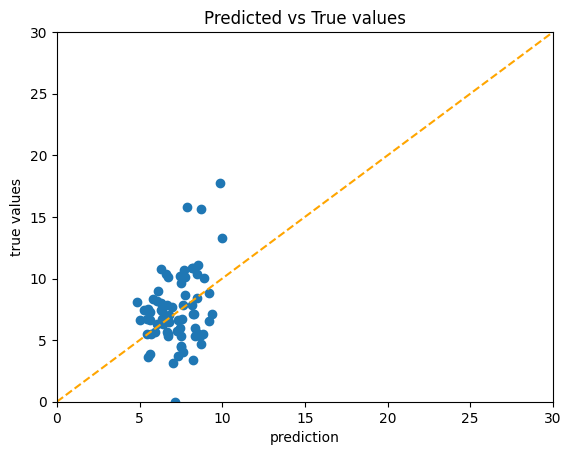

G , <class 'sklearn.ensemble._forest.RandomForestRegressor'>
Best Parameters: {'estimator__max_depth': 6, 'estimator__n_estimators': 200, 'estimator__random_state': 42, 'rfe__n_features_to_select': 20}
RMSE:  2.3328339396134714
R2 score : 0.3768353024823793
Adjusted R2 score : 0.35326163793812726


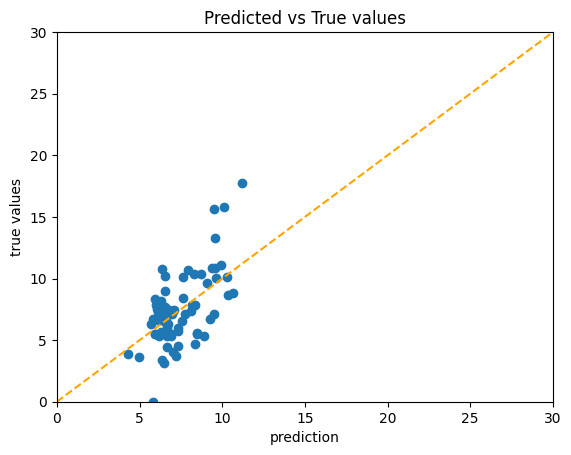

G , <class 'xgboost.sklearn.XGBRegressor'>
Best Parameters: {'estimator__learning_rate': 0.1, 'estimator__max_depth': 5, 'estimator__n_estimators': 500, 'estimator__random_state': 42, 'rfe__n_features_to_select': 15}
RMSE:  1.541382749177706
R2 score : 0.7279453329462734
Adjusted R2 score : 0.7176537912649646


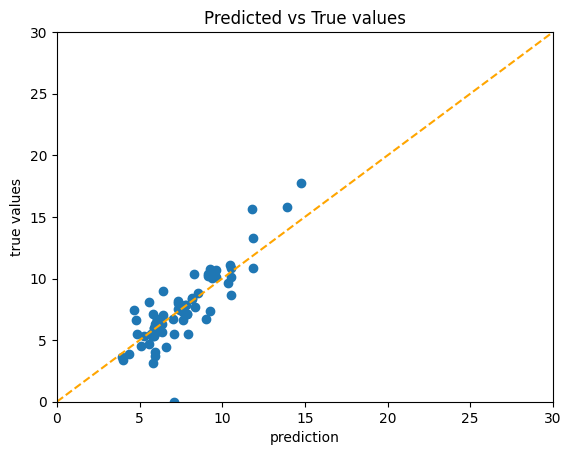

In [ ]:
r2_g={}
model_g={}
train_model("G",LinearRegression,r2_g,model_g)
train_model("G",Lasso,r2_g,model_g)
train_model("G",Ridge,r2_g,model_g)
train_model("G",RandomForestRegressor,r2_g,model_g)
train_model("G",XGBRegressor,r2_g,model_g)
# G , <class 'sklearn.linear_model._base.LinearRegression'>
# Best Parameters: {}
# RMSE:  2.819057510444069
# R2 score : 0.08999649741211824
# Adjusted R2 score : 0.05401612828179014

# G , <class 'sklearn.linear_model._coordinate_descent.Lasso'>
# Best Parameters: {'estimator__alpha': 0.01, 'estimator__max_iter': 1000}
# RMSE:  2.806237619151376
# R2 score : 0.09825430667380197
# Adjusted R2 score : 0.06260044071032789

# G , <class 'sklearn.linear_model._ridge.Ridge'>
# Best Parameters: {'estimator__alpha': 20, 'estimator__max_iter': 1000}
# RMSE:  2.8287845294774026
# R2 score : 0.08370581877292937
# Adjusted R2 score : 0.0474767242927816

# G , <class 'sklearn.ensemble._forest.RandomForestRegressor'>
# Best Parameters: {'estimator__max_depth': 6, 'estimator__n_estimators': 200}
# RMSE:  2.128852218200991
# R2 score : 0.48104915784791513
# Adjusted R2 score : 0.4605305084053285

# G , <class 'xgboost.sklearn.XGBRegressor'>
# Best Parameters: {'estimator__learning_rate': 0.1, 'estimator__max_depth': 5, 'estimator__n_estimators': 500}
# RMSE:  1.4177288607026048
# R2 score : 0.7698443964549365
# Adjusted R2 score : 0.7607443396426111

In [ ]:
e_best_model=max(r2_e, key=r2_e.get)
s_best_model=max(r2_s, key=r2_s.get)
g_best_model=max(r2_g, key=r2_g.get)

# Model Interpretation

In [ ]:
def evaluate_model(model):
  X_train, y_train, X_test,y_test = split_data("esgScore")
  X_test["environmentScore"]=model_e[model].predict(X_test)
  X_test["socialScore"]=model_s[model].predict(X_test)
  X_test["governanceScore"]=model_g[model].predict(X_test)

  X_test["predictedEsg"]=X_test["governanceScore"]+X_test["environmentScore"]+X_test["socialScore"]
  print(model)
  print("RMSE :", mean_squared_error(y_test,X_test["predictedEsg"],squared=False))
  print("R2 score :", r2_score(y_test, X_test["predictedEsg"]))

def shap_plot(type,model):
  if type=="E":
    pipeline=model_e
    X_train, y_train, X_test,y_test = split_data("environmentScore")
  elif type=="S":
    pipeline=model_s
    X_train, y_train, X_test,y_test = split_data("socialScore")
  elif type=="G":
    pipeline=model_g
    X_train, y_train, X_test,y_test = split_data("governanceScore")
  X_train_transformed=pipeline[XGBRegressor][:-1].transform(X_train)
  if model=="XGB":
    explainer = shap.Explainer(pipeline[XGBRegressor][-1])
  else:
    explainer = shap.TreeExplainer(pipeline[RandomForestRegressor][-1])
  shap_values = explainer(X_train_transformed)
  shap.summary_plot(shap_values, X_train_transformed, feature_names=pipeline[XGBRegressor][:-1].get_feature_names_out())

def pdp_plot(type,model,ncols=6,nrows=4,figsize=(30,30)):
  if type=="E":
    pipeline=model_e
    X_train, y_train, X_test,y_test = split_data("environmentScore")
  elif type=="S":
    pipeline=model_s
    X_train, y_train, X_test,y_test = split_data("socialScore")
  elif type=="G":
    pipeline=model_g
    X_train, y_train, X_test,y_test = split_data("governanceScore")
  common_params = {
      "subsample": 50,
      "n_jobs": 2,
      "grid_resolution": 20,
      "random_state": 0,
      "percentiles":(0, 1)
  }
  print("Computing partial dependence plots...")
  features_info = {
      # features of interest
      "features": X_train.columns,
      # type of partial dependence plot
      "kind": "average", #cannot use ICE as there are categorical features
      # information regarding categorical features
      "categorical_features": categorical_features
  }
  _, ax = plt.subplots(ncols=ncols, nrows=nrows, figsize=figsize, constrained_layout=True)
  display = PartialDependenceDisplay.from_estimator(
      pipeline[model],
      X_train,
      **features_info,
      ax=ax,
      **common_params,
  )
  _ = display.figure_.suptitle(
      (
          f"Partial dependence of {type} Score"
      ),
      fontsize=16,
)

In [ ]:
evaluate_model(LinearRegression)
evaluate_model(Lasso)
evaluate_model(Ridge)
evaluate_model(RandomForestRegressor)
evaluate_model(XGBRegressor)
# <class 'sklearn.linear_model._base.LinearRegression'>
# RMSE : 6.490129481001714
# R2 score : 0.35784530320101515
# <class 'sklearn.linear_model._coordinate_descent.Lasso'>
# RMSE : 6.410448392274678
# R2 score : 0.37351632681449165
# <class 'sklearn.linear_model._ridge.Ridge'>
# RMSE : 6.481146758739415
# R2 score : 0.3596216330803176
# <class 'sklearn.ensemble._forest.RandomForestRegressor'>
# RMSE : 5.773966460072493
# R2 score : 0.49174524019179455
# <class 'xgboost.sklearn.XGBRegressor'>
# RMSE : 3.9235471205666035
# R2 score : 0.7653121068024413

<class 'sklearn.linear_model._base.LinearRegression'>
RMSE : 6.53314435169411
R2 score : 0.3493050305701597
<class 'sklearn.linear_model._coordinate_descent.Lasso'>
RMSE : 6.596815537231801
R2 score : 0.33656004709845677
<class 'sklearn.linear_model._ridge.Ridge'>
RMSE : 6.528249066888472
R2 score : 0.35027979666716513
<class 'sklearn.ensemble._forest.RandomForestRegressor'>
RMSE : 5.438049767159534
R2 score : 0.5491632644655146
<class 'xgboost.sklearn.XGBRegressor'>
RMSE : 3.9115838580301827
R2 score : 0.76674109563654


In [ ]:
X_train, y_train, X_test,y_test = split_data("esgScore")
X_test["environmentScore"]=model_e[e_best_model].predict(X_test)
X_test["socialScore"]=model_s[s_best_model].predict(X_test)
X_test["governanceScore"]=model_g[g_best_model].predict(X_test)

X_test["predictedEsg"]=X_test["governanceScore"]+X_test["environmentScore"]+X_test["socialScore"]
print("Best Combination")
print("RMSE :", mean_squared_error(y_test,X_test["predictedEsg"],squared=False))
print("R2 score :", r2_score(y_test, X_test["predictedEsg"]))

Best Combination
RMSE : 6.530178255166542
R2 score : 0.34989573723842027


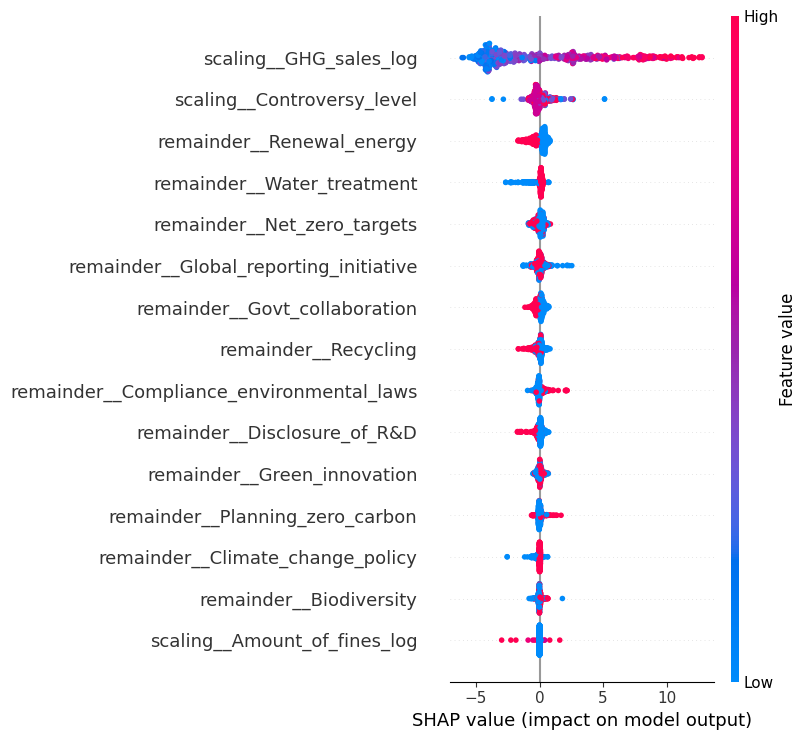

In [ ]:
# shap_plot("E",XGBRegressor)
X_train, y_train, X_test,y_test = split_data("environmentScore")
X_train_transformed=model_e[XGBRegressor][:-1].transform(X_train)
explainer = shap.Explainer(model_e[XGBRegressor][-1])
shap_values = explainer(X_train_transformed)
shap.summary_plot(shap_values, X_train_transformed, feature_names=model_e[XGBRegressor][:-1].get_feature_names_out())


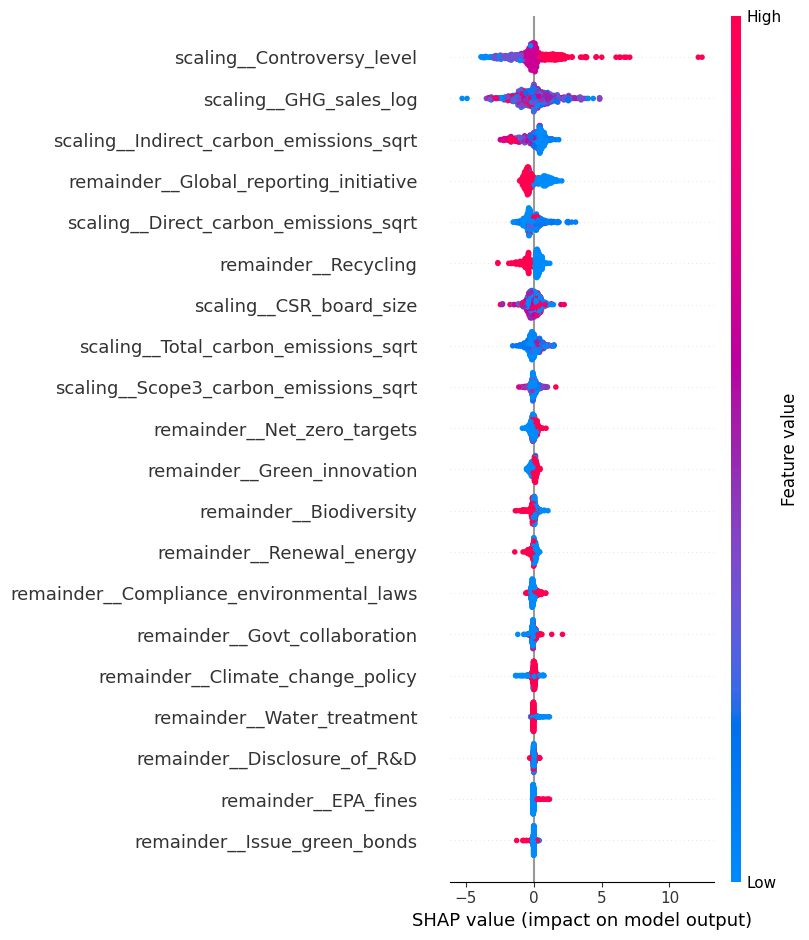

In [ ]:
# shap_plot("S",XGBRegressor)
X_train, y_train, X_test,y_test = split_data("socialScore")
X_train_transformed=model_s[XGBRegressor][:-1].transform(X_train)
explainer = shap.Explainer(model_s[XGBRegressor][-1])
shap_values = explainer(X_train_transformed)
shap.summary_plot(shap_values, X_train_transformed, feature_names=model_s[XGBRegressor][:-1].get_feature_names_out())

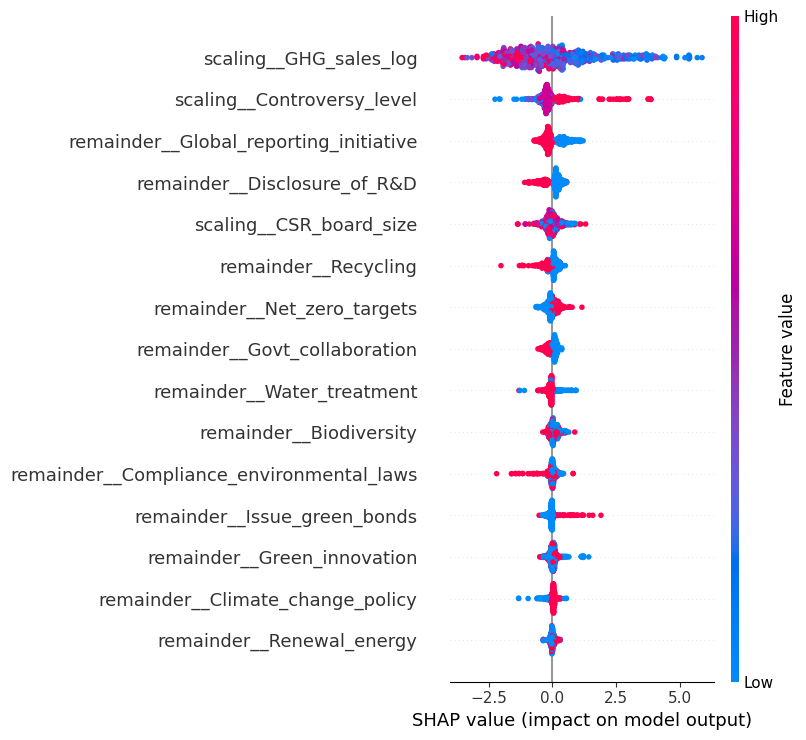

In [ ]:
# shap_plot("G",XGBRegressor)
X_train, y_train, X_test,y_test = split_data("governanceScore")
X_train_transformed=model_g[XGBRegressor][:-1].transform(X_train)
explainer = shap.Explainer(model_g[XGBRegressor][-1])
shap_values = explainer(X_train_transformed)
shap.summary_plot(shap_values, X_train_transformed, feature_names=model_g[XGBRegressor][:-1].get_feature_names_out())

In [ ]:
categorical_features = ["CSR_board_size","Compliance_environmental_laws","EPA_fines","Issue_green_bonds","Govt_collaboration","Water_treatment","Recycling","Biodiversity","Green_innovation","Integrated_reporting_framework", \
                        "Net_zero_targets","Disclosure_of_R&D","Climate_change_policy","Renewal_energy","Global_reporting_initiative","Integrated_reporting_framework","Controversy_level","Planning_zero_carbon"]


Computing partial dependence plots...


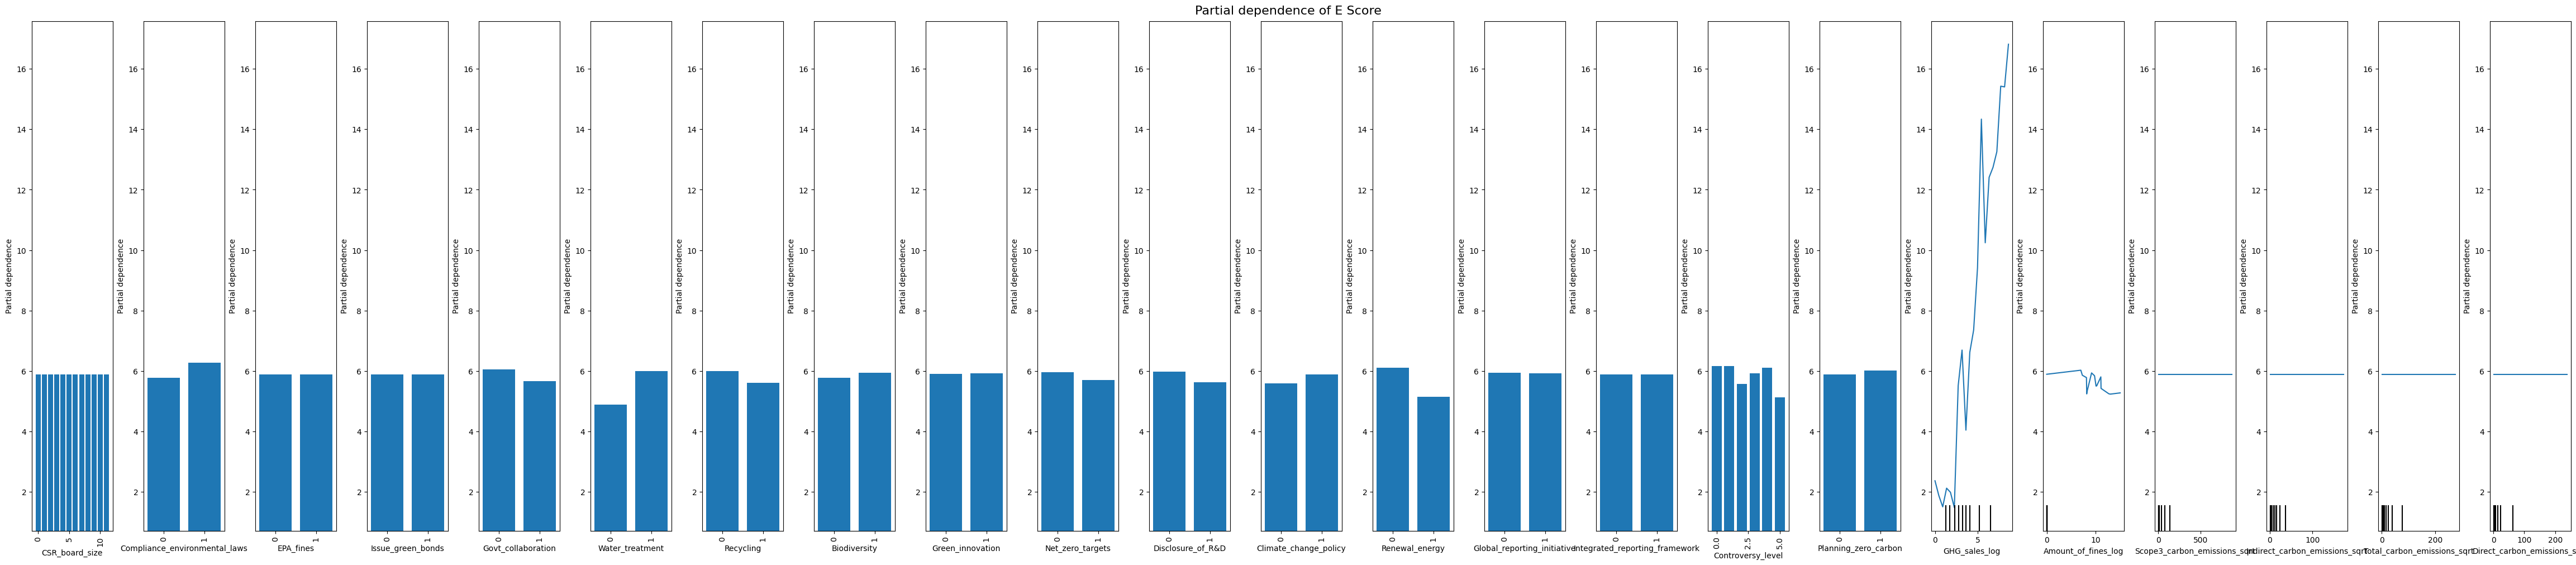

In [ ]:
pdp_plot("E",XGBRegressor,23,1, (46,10))

Computing partial dependence plots...


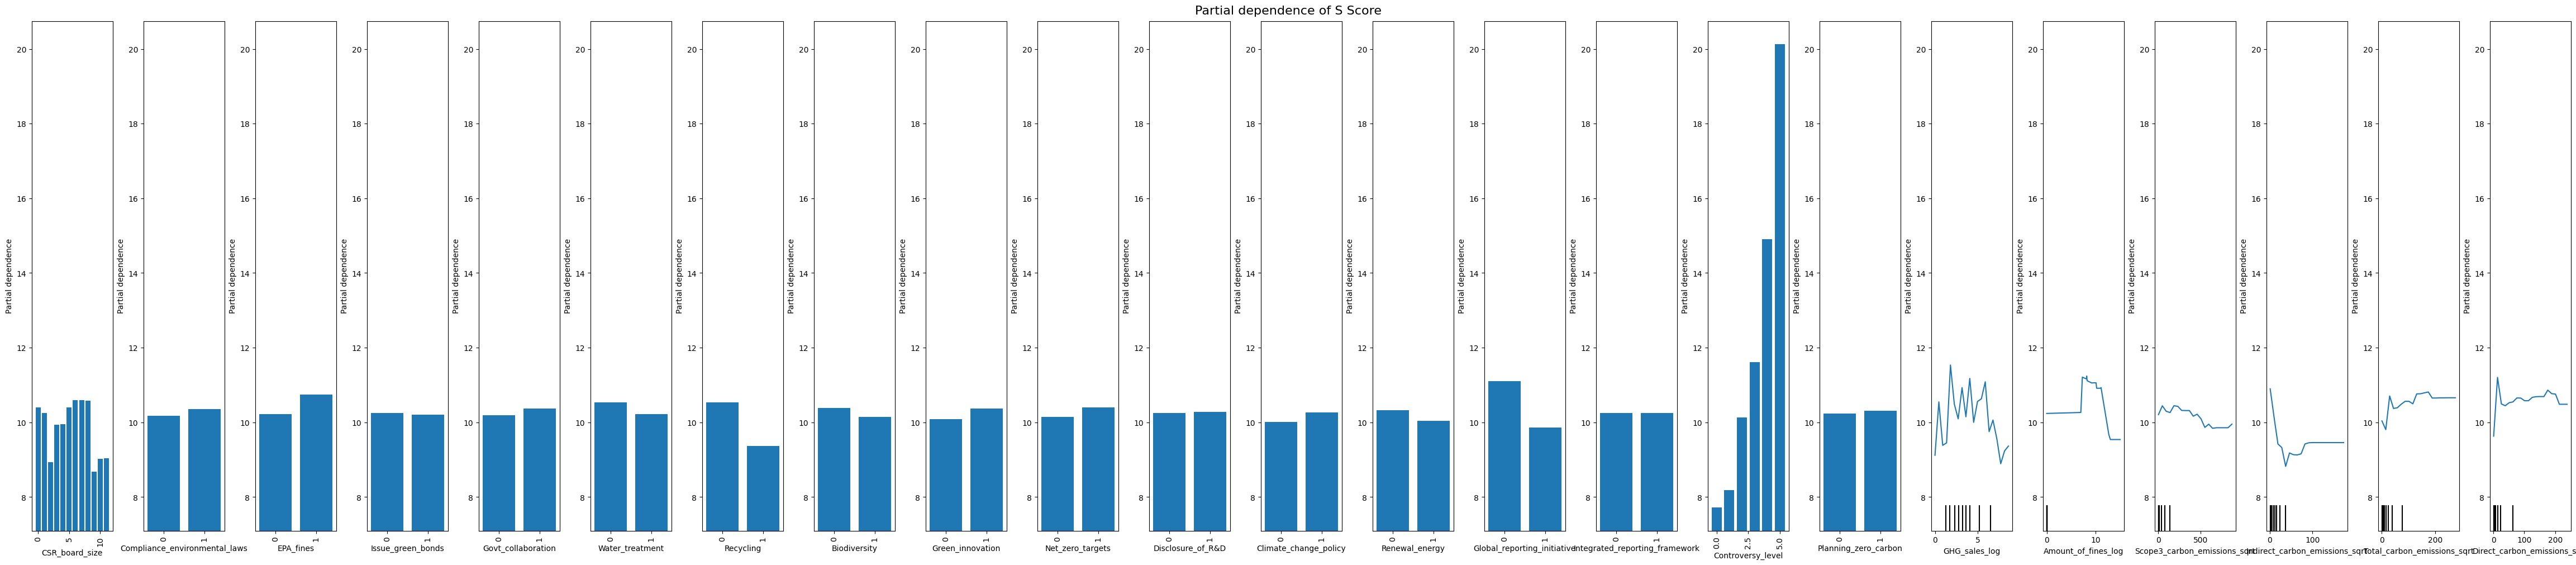

In [ ]:
pdp_plot("S",XGBRegressor,23,1, (46,10))

Computing partial dependence plots...


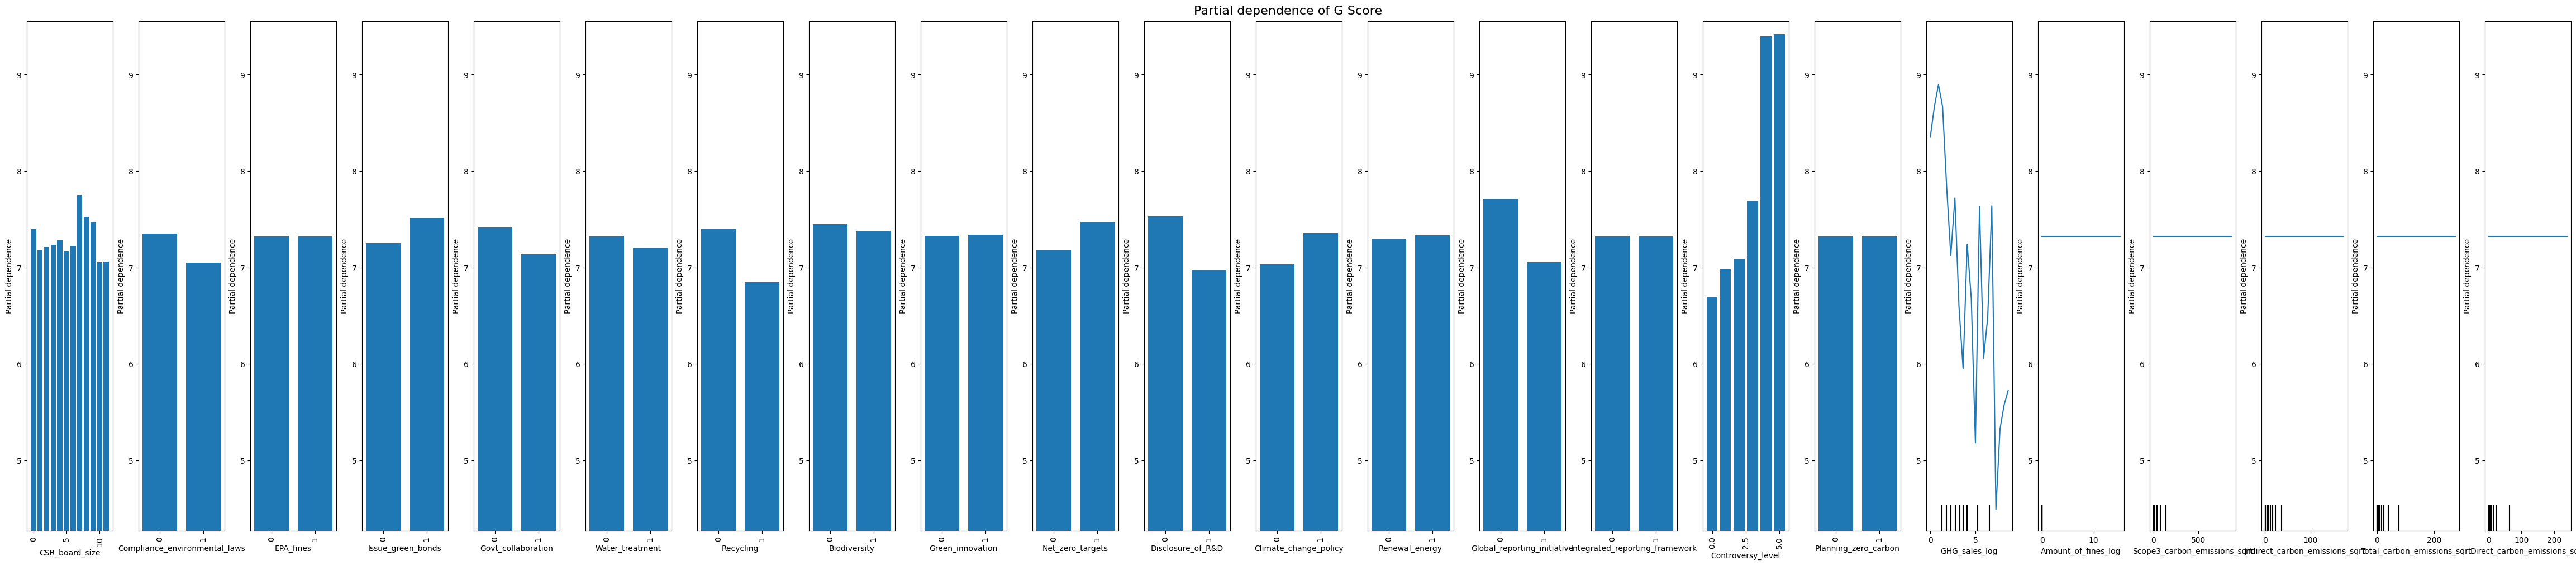

In [ ]:
pdp_plot("G",XGBRegressor,23,1, (46,10))

In [ ]:
# pipeline=model_g[XGBRegressor]
# features=pipeline[:-1].get_feature_names_out()
# for i in range(len(features)):
#   features[i]=features[i].replace("scaling__","").replace("remainder__","").replace("&","\&").replace("_","\_")
# feature_weights=zip(features,pipeline[-1].feature_importances_)
# feature_weights=sorted(feature_weights, key=lambda x: abs(x[1]), reverse=True)
# feature_weights

In [ ]:
def feature_importance(type):
  print(type)
  if type=="E":
    pipeline=model_e[e_best_model]
  elif type=="S":
    pipeline=model_s[s_best_model]
  elif type=="G":
    pipeline=model_g[g_best_model]
  features=pipeline[:-1].get_feature_names_out()
  for i in range(len(features)):
    features[i]=features[i].replace("scaling__","").replace("remainder__","").replace("&","\&").replace("_","\_")
  feature_weights=zip(features,pipeline[-1].coef_)
  feature_weights=sorted(feature_weights, key=lambda x: abs(x[1]), reverse=True)
  feature_weights.append((" ",pipeline[-1].intercept_))
  for m, c in feature_weights:
    print(m,": ",c)
  with open('fw_model_'+type.lower()+'.pkl', 'wb') as f:
    pickle.dump(feature_weights, f)


E
GHG\_sales\_log :  3.4562886459562576
Renewal\_energy :  -1.4581519235779423
Water\_treatment :  1.208714677367821
EPA\_fines :  0.9310646840269869
Green\_innovation :  -0.8315520136415191
Climate\_change\_policy :  0.8255739987448464
Govt\_collaboration :  -0.7730132985939102
Issue\_green\_bonds :  -0.7292727527560511
Direct\_carbon\_emissions\_sqrt :  0.522527842392097
Recycling :  -0.5053638871698222
Indirect\_carbon\_emissions\_sqrt :  -0.46738056639381237
Disclosure\_of\_R\&D :  -0.4412692080933632
CSR\_board\_size :  0.42619478104387126
Scope3\_carbon\_emissions\_sqrt :  0.38431503900461406
Planning\_zero\_carbon :  0.37354007510648346
Integrated\_reporting\_framework :  0.31905986163903155
Compliance\_environmental\_laws :  0.30953756572487223
Global\_reporting\_initiative :  0.23609954879954836
Biodiversity :  0.1670592654049371
Net\_zero\_targets :  -0.14216813153667548
  :  5.579131405925823
S
Controversy\_level :  1.5674221938783988
Global\_reporting\_initiative :  -1.2255

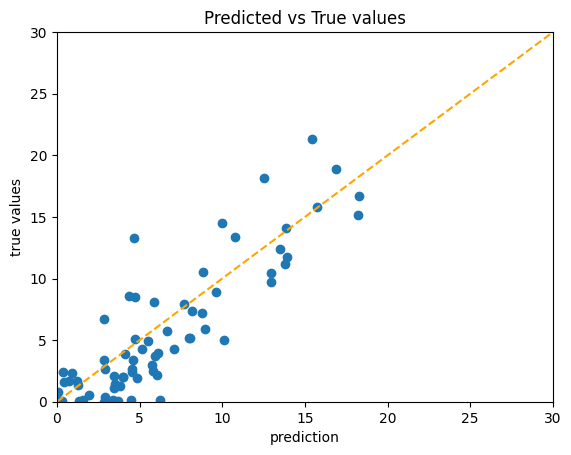

S , <class 'sklearn.linear_model._ridge.Ridge'>
Best Parameters: {'estimator__alpha': 20, 'estimator__max_iter': 1000, 'estimator__random_state': 42, 'rfe__n_features_to_select': 15}
RMSE:  3.9665749512265562
R2 score : 0.13164936530278726
Adjusted R2 score : 0.09880057484549132


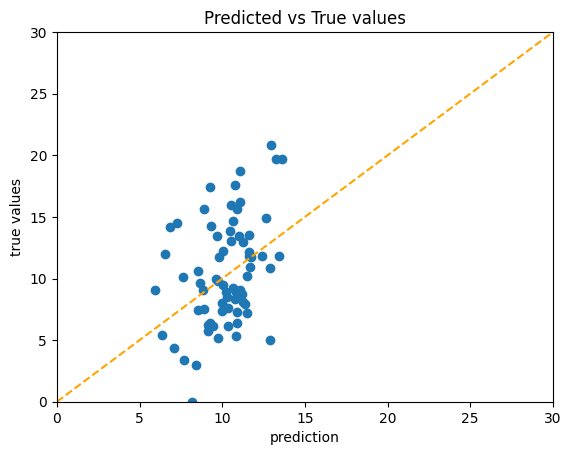

G , <class 'sklearn.linear_model._base.LinearRegression'>
Best Parameters: {'rfe__n_features_to_select': 15}
RMSE:  2.788880296259724
R2 score : 0.10937488000846418
Adjusted R2 score : 0.07568346921931057


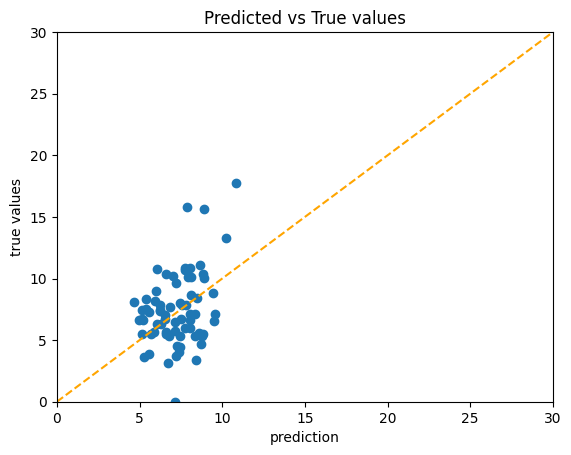

In [ ]:
feature_importance("E")
feature_importance("S")
feature_importance("G")

train_model("E",e_best_model,r2_e,model_e)#,prod=True)
train_model("S",s_best_model,r2_s,model_s)#,prod=True)
train_model("G",g_best_model,r2_g,model_g)#,prod=True)
with open('model_e.pkl', 'wb') as f:
  pickle.dump(model_e[e_best_model], f)
with open('model_s.pkl', 'wb') as f:
  pickle.dump(model_s[s_best_model], f)
with open('model_g.pkl', 'wb') as f:
  pickle.dump(model_g[g_best_model], f)

# Deployment

In [ ]:
!mkdir pages

In [ ]:
%%writefile helper.py

import streamlit as st

def defaults():
    st.session_state.saved_values = {
        "Water_treatment": 0,
        "GHG_sales": 0,
        "Biodiversity": 0,
        "Global_reporting_initiative": 0,
        "Climate_change_policy": 0,
        "Govt_collaboration": 0,
        "Recycling": 0,
        "ESG_funds": 0,
        "Disclosure_of_R&D": 0,
        "EPA_fines": 0,
        "Waste_management": 0,
        "Controversy_level": 3,
        "Integrated_reporting_framework": 0,
        "Indirect_carbon_emissions": 0,
        "Planning_zero_carbon": 0,
        "Green_innovation": 0,
        "S": 0,
        "Waste_management": 0,
        "CSR_board_size": 0,
        "Net_zero_targets": 0,
        "Issue_green_bonds": 0,
        "Scope3_carbon_emissions": 0,
        'Compliance_environmental_laws': 0,
        'Amount_of_fines' : 0,
        'Total_carbon_emissions' : 0,
        'Direct_carbon_emissions' : 0,
        'Renewal_energy': 0
    }

def update_value(key):
    st.session_state.saved_values[key]=st.session_state[key]

Writing helper.py


In [ ]:
%%writefile Homepage.py

import streamlit as st
import pickle

st.set_page_config(page_title="Homepage", page_icon="📕")

st.markdown("# ESG Score Calculator Homepage")
st.sidebar.header("Homepage")

with open('fw_model_e.pkl', 'rb') as f:
  feature_weights_e = pickle.load(f)
with open('fw_model_s.pkl', 'rb') as f:
  feature_weights_s = pickle.load(f)
with open('fw_model_g.pkl', 'rb') as f:
  feature_weights_g = pickle.load(f)
st.write('Welcome to ESG Score Calculator. The calculator is used to calculate the Sustainalytics ESG Risk Score using equations discovered using our machine learning algorithms. '+ \
         'The formula of the equations are documented as follow: ')
st.markdown("## E Score Equation")
e_equation="E Score = "
for i, (f,c) in enumerate(feature_weights_e):
  if c>0 and i>0:
    e_equation+=f"+ {round(c,2)}*{f}"
  else:
    e_equation+=f" {round(c,2)}*{f}"
  if (i-2)%3==0:
    st.latex(e_equation)
    e_equation=""
st.latex(e_equation[:-2])

st.markdown("## S Score Equation")
s_equation="S Score = "
for i, (f,c) in enumerate(feature_weights_s):
  if c>0 and i>0:
    s_equation+=f"+ {round(c,2)}*{f}"
  else:
    s_equation+=f" {round(c,2)}*{f}"
  if (i-2)%3==0:
    st.latex(s_equation)
    s_equation=""
st.latex(s_equation[:-2])

st.markdown("## G Score Equation")
g_equation="G Score = "
for i, (f,c) in enumerate(feature_weights_g):
  if c>0 and i>0:
    g_equation+=f"+ {round(c,2)}*{f}"
  else:
    g_equation+=f" {round(c,2)}*{f}"
  if (i-2)%3==0:
    st.latex(g_equation)
    g_equation=""
st.latex(g_equation[:-2])

st.markdown("## ESG Score Equation")
st.latex(r'''ESG Risk Score = E Score + S Score + G Score''')


Writing Homepage.py


In [ ]:
%%writefile pages/1_ESG_Score_Calculator.py

import streamlit as st
from helper import defaults, update_value

import pandas as pd
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.feature_selection import RFE
import numpy as np
import pickle

st.set_page_config(page_title="Calculator", page_icon="🧮")

st.markdown("# ESG Score Calculator")
st.sidebar.header("Calculator")

with open('model_e.pkl', 'rb') as f:
  model_e = pickle.load(f)
with open('model_s.pkl', 'rb') as f:
  model_s = pickle.load(f)
with open('model_g.pkl', 'rb') as f:
  model_g = pickle.load(f)

if "saved_values" not in st.session_state:
    defaults()
else:
  for key in st.session_state.saved_values:
    st.session_state[key]=st.session_state.saved_values[key]

num_input=["GHG_sales","ESG_funds","Indirect_carbon_emissions","CSR_board_size","Scope3_carbon_emissions","Net_zero_targets", 'Amount_of_fines', 'Total_carbon_emissions', 'Direct_carbon_emissions', ]
for num in num_input:
  st.number_input(num.replace("-"," "),key=num, on_change=update_value, args=[num])

st.slider("Controversy level", 0, 5, key="Controversy_level", on_change=update_value, args=["Controversy_level"])

cat_input=["Water_treatment","Biodiversity","Global_reporting_initiative","Climate_change_policy","Govt_collaboration","Recycling","Disclosure_of_R&D","EPA_fines","Waste_management","Integrated_reporting_framework",\
           "Planning_zero_carbon","Green_innovation","S","Issue_green_bonds", 'Compliance_environmental_laws', 'Renewal_energy']

for cat in cat_input:
  st.checkbox(cat.replace("-"," "),key=cat, on_change=update_value, args=[cat])

submitted = st.button("Submit")

if submitted:
  test=pd.DataFrame(st.session_state.saved_values,index=[0])
  for col in ["GHG_sales","ESG_funds",'Amount_of_fines']:
    test[col+"_log"]=np.log(test[col]+1)
    test.drop(col,axis=1,inplace=True)
  for col in ["Indirect_carbon_emissions","Scope3_carbon_emissions",'Total_carbon_emissions', 'Direct_carbon_emissions']:
    test[col+"_sqrt"]=np.sqrt(test[col]+1)
    test.drop(col,axis=1,inplace=True)
  e_score=max(0,model_e.predict(test)[0])
  s_score=max(0,model_s.predict(test)[0])
  g_score=max(0,model_g.predict(test)[0])
  st.write(f"E Score: {round(e_score,2)}")
  st.write(f"S Score: {round(s_score,2)}")
  st.write(f"G Score: {round(g_score,2)}")
  st.write(f"ESG Score: {round(e_score+s_score+g_score,2)}")

Writing pages/1_ESG_Score_Calculator.py


In [ ]:
%%writefile pages/2_ESG_Score_Explainer.py

import streamlit as st
from helper import defaults, update_value
import pickle
import pandas as pd
import numpy as np

st.set_page_config(page_title="Explainer", page_icon="⚖️")

st.markdown("# ESG Score Explainer")
st.sidebar.header("Explainer")

with open('fw_model_e.pkl', 'rb') as f:
  feature_weights_e = pickle.load(f)
  feature_weights_e.pop()
with open('fw_model_s.pkl', 'rb') as f:
  feature_weights_s = pickle.load(f)
  feature_weights_s.pop()
with open('fw_model_g.pkl', 'rb') as f:
  feature_weights_g = pickle.load(f)
  feature_weights_g.pop()

with open('model_e.pkl', 'rb') as f:
  model_e = pickle.load(f)
with open('model_s.pkl', 'rb') as f:
  model_s = pickle.load(f)
with open('model_g.pkl', 'rb') as f:
  model_g = pickle.load(f)

if "saved_values" not in st.session_state:
    defaults()
else:
  for key in st.session_state.saved_values:
    st.session_state[key]=st.session_state.saved_values[key]

#Button to select E, S, G, or total
st.selectbox(
    "Pillar to be Analyzed",
    ("E", "S", "G", "ESG"), key="component")

#slider to choose n
st.slider("Number of Key Factors", 1, 5, key="n_features")

submitted = st.button("Submit")

if submitted:
  #save the sum of contribution of each relevant feature to a dict
  contribution={}
  df=pd.DataFrame(st.session_state.saved_values,index=[0])
  for col in ["GHG_sales","ESG_funds",'Amount_of_fines']:
    df[col+"_log"]=np.log(df[col]+1)
    df.drop(col,axis=1,inplace=True)
  for col in ["Indirect_carbon_emissions","Scope3_carbon_emissions",'Total_carbon_emissions', 'Direct_carbon_emissions']:
    df[col+"_sqrt"]=np.sqrt(df[col]+1)
    df.drop(col,axis=1,inplace=True)
  if "E" in st.session_state['component']:
    transformed=model_e[:-1].transform(df)[0]
    col_names=[]
    for i in range(len(model_e[:-1].get_feature_names_out())):
      col_names.append(model_e[:-1].get_feature_names_out()[i].split("__")[1])
    transformed=pd.DataFrame(transformed.reshape(1,-1),columns=col_names)
    for f,w in feature_weights_e:
      f=f.replace("\\","")
      if f not in contribution: contribution[f]=0
      contribution[f]+=w*transformed[f][0]
  if "S" in st.session_state['component']:
    transformed=model_s[:-1].transform(df)[0]
    col_names=[]
    for i in range(len(model_s[:-1].get_feature_names_out())):
      col_names.append(model_s[:-1].get_feature_names_out()[i].split("__")[1])
    transformed=pd.DataFrame(transformed.reshape(1,-1),columns=col_names)
    for f,w in feature_weights_s:
      f=f.replace("\\","")
      if f not in contribution: contribution[f]=0
      contribution[f]+=w*transformed[f][0]
  if "G" in st.session_state['component']:
    transformed=model_g[:-1].transform(df)[0]
    col_names=[]
    for i in range(len(model_g[:-1].get_feature_names_out())):
      col_names.append(model_g[:-1].get_feature_names_out()[i].split("__")[1])
    transformed=pd.DataFrame(transformed.reshape(1,-1),columns=col_names)
    for f,w in feature_weights_g:
      f=f.replace("\\","")
      if f not in contribution: contribution[f]=0
      contribution[f]+=w*transformed[f][0]

  #sort the dict by value and select the top n and bottom n
  contribution_sorted=sorted(contribution.items(), key=lambda x: x[1]) #lower is better
  top_n=contribution_sorted[:st.session_state.n_features]
  bottom_n=contribution_sorted[-st.session_state.n_features-1:-1][::-1]

  #output
  st.markdown("## Top Positive Factors")
  for i in range(len(top_n)):
    if top_n[i][1]>=0: break
    feature=top_n[i][0].split("_")
    if feature[-1] in ["log","sqrt"]: feature.pop()
    st.write(f"{' '.join(feature)} : {top_n[i][1]}")
  st.markdown("## Top Negative Factors")
  for i in range(len(bottom_n)):
    if bottom_n[i][1]<=0: break
    feature=bottom_n[i][0].split("_")
    if feature[-1] in ["log","sqrt"]: feature.pop()
    st.write(f"{' '.join(feature)} : {bottom_n[i][1]}")

Writing pages/2_ESG_Score_Explainer.py


In [ ]:
!streamlit run Homepage.py &>/content/logs.txt &

In [ ]:
!cat /content/logs.txt

In [ ]:
!npx localtunnel --port 8501 & curl ipv4.icanhazip.com

34.31.210.201
npm WARN exec The following package was not found and will be installed: localtunnel@2.0.2
your url is: https://chatty-hotels-press.loca.lt


In [ ]:
with open('fw_model_e.pkl', 'rb') as f:
  feature_weights_e = pickle.load(f)
with open('fw_model_s.pkl', 'rb') as f:
  feature_weights_s = pickle.load(f)
with open('fw_model_g.pkl', 'rb') as f:
  feature_weights_g = pickle.load(f)

e_equation="E Score = "
for i, (f,c) in enumerate(feature_weights_e):
  f=f.replace('\_',' ')
  if c>0 and i>0:
    e_equation+=f"+ {round(c,2)}*{f}"
  else:
    e_equation+=f" {round(c,2)}*{f}"
  # if (i-2)%3==0:
  #   p(e_equation)
  #   e_equation=""
print(e_equation[:-2])

s_equation="S Score = "
for i, (f,c) in enumerate(feature_weights_s):
  f=f.replace('\_',' ')
  if c>0 and i>0:
    s_equation+=f"+ {round(c,2)}*{f}"
  else:
    s_equation+=f" {round(c,2)}*{f}"
  # if (i-2)%3==0:
  #   st.latex(s_equation)
  #   s_equation=""
print(s_equation[:-2])

g_equation="G Score = "
for i, (f,c) in enumerate(feature_weights_g):
  f=f.replace('\_',' ')
  if c>0 and i>0:
    g_equation+=f"+ {round(c,2)}*{f}"
  else:
    g_equation+=f" {round(c,2)}*{f}"
  # if (i-2)%3==0:
  #   st.latex(g_equation)
  #   g_equation=""
print(g_equation[:-2])

E Score =  3.46*GHG sales log -1.46*Renewal energy+ 1.21*Water treatment+ 0.93*EPA fines -0.83*Green innovation+ 0.83*Climate change policy -0.77*Govt collaboration -0.73*Issue green bonds+ 0.52*Direct carbon emissions sqrt -0.51*Recycling -0.47*Indirect carbon emissions sqrt -0.44*Disclosure of R\&D+ 0.43*CSR board size+ 0.38*Scope3 carbon emissions sqrt+ 0.37*Planning zero carbon+ 0.32*Integrated reporting framework+ 0.31*Compliance environmental laws+ 0.24*Global reporting initiative+ 0.17*Biodiversity -0.14*Net zero targets+ 5.58
S Score =  1.57*Controversy level -1.23*Global reporting initiative -0.58*Recycling+ 0.48*Net zero targets -0.46*Indirect carbon emissions sqrt+ 0.43*Green innovation+ 0.39*Compliance environmental laws -0.27*Direct carbon emissions sqrt+ 0.24*EPA fines+ 0.24*Climate change policy -0.23*Issue green bonds -0.21*Water treatment -0.2*Renewal energy+ 0.2*Total carbon emissions sqrt -0.17*Integrated reporting framework+ 10.76
G Score =  1.57*Issue green bonds -

# End of Code